In [4]:
#pip install --upgrade nbformat

# Executive Summary
This analysis evaluates the business performance of Yandex.Afisha, focusing on user behavior, sales trends, and marketing efficiency. The study spans from June 2017 to May 2018, leveraging server logs, order data, and marketing expenses.

### Key Insights:
- **User Engagement**: Daily active users (DAU) average 907, with significant seasonal variations.
- **Sales Performance**: December 2017 recorded the highest sales, aligning with seasonal trends.
- **Marketing ROI**: Only 3 out of 7 marketing sources are profitable, with Source 1 and Source 2 leading in ROI.

### Recommendations:
1. Reallocate marketing budgets to high-performing sources (Source 1 and Source 2).
2. Address cybersecurity vulnerabilities to prevent potential server failures.
3. Enhance user retention strategies to improve lifetime value (LTV).

---

# Table of Contents
1. [Introduction](#Introduction)
2. [Datasets](#Datasets)
   - [Loading Peak 500](#Loading-Peak-500)
   - [Insights for Visitor Dataset](#Insights-for-Visitor-Dataset)
   - [Insights for Order Dataset](#Insights-for-Order-Dataset)
   - [Insights for Costs Dataset](#Insights-for-Costs-Dataset)
3. [Data Preprocessing](#Data-Preprocessing)
   - [Adjust Column Names](#Adjust-Column-Names)
   - [Convert Dates to Datetime](#Convert-Dates-to-Datetime)
4. [Data Analysis](#Data-Analysis)
   - [Product Analysis](#Product-Analysis)
   - [Sales Analysis](#Sales-Analysis)
   - [Marketing Analysis](#Marketing-Analysis)
5. [Final Conclusion](#Final-Conclusion)

# 1. Introduction
Yandex.Afisha is an online platform for purchasing tickets to various events. This project aims to analyze its business performance by examining user behavior, sales trends, and marketing efficiency.

The analysis is based on data collected from June 2017 to May 2018, including server logs, order data, and marketing expenses. The goal is to provide actionable insights to improve user engagement, optimize marketing strategies, and enhance overall profitability.

In [5]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import seaborn as sns



from functools import reduce
from io import BytesIO
import requests
import os
import time 
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

First, we import all the necessary libraries for editing the project.

# 2. Datasets Overview
This section provides an overview of the datasets used in the analysis.

2.2 Loading peak 500 - getting Insights...

2.2.1 ...for visitor dataset
2.2.2 ...for order dataset
2.2.3 ...for costs dataset

2.3 Loading full datasets

2.1 Loading peak 500

In [6]:
vilog_spreadsheet_id = '1exXVNH4nA3lJ2qBPBmomzHGOaWZl0i4SMshIbzYYIJM'
file_name1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(vilog_spreadsheet_id)
r1 = requests.get(file_name1)
vilog_500 = pd.read_csv(BytesIO(r1.content), nrows=500)
    
orlog_spreadsheet_id = '1osw7Gn8PTnt3Ae7w4EBzypGzUJVxCSXS8xxJV8BbcL0'
file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(orlog_spreadsheet_id)
r2 = requests.get(file_name2)
orlog_500 = pd.read_csv(BytesIO(r2.content), nrows=500)
    
costs_spreadsheet_id = '1saZ4Eal2zQe6IQztTrrfEs6cccTBBQhQQrO2InLQXeY'
file_name3 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(costs_spreadsheet_id)
r3 = requests.get(file_name3)
costs_500 = pd.read_csv(BytesIO(r3.content), nrows=500)

First, we get an overview of the data set. Since we do not know how large the corresponding files are, we first load only a fraction into our notebook.

In [7]:
vilog_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 101.4 KB


In [8]:
vilog_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 101.4 KB


In [9]:
vilog_500['Start Ts'] = pd.to_datetime(vilog_500['Start Ts'])
vilog_500['End Ts'] = pd.to_datetime(vilog_500['End Ts'])
vilog_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Device     500 non-null    object        
 1   End Ts     500 non-null    datetime64[ns]
 2   Source Id  500 non-null    int64         
 3   Start Ts   500 non-null    datetime64[ns]
 4   Uid        500 non-null    uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 42.8 KB


End Ts & Start Ts seems to be dates, like somewhat of a timestamp.

However, considering that it is object type in the current state, and taking into account that we are only looking at the first 500 rows, it gives the required memory an indication of the data size of the file.

As a rule, object type requires more memory, so we should change the type while loading the data and thus save our memory.

By changing the type to datetime, we can drastically reduce the amount of memory required.

2.2.2 ... for order dataset

In [10]:
orlog_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 41.1 KB


In [11]:
orlog_500.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Its seems also Buy Ts was converted as an object type. However, the memory usage seems to be only a third compered to visitor dataset, so we could assume the order dataset is relatively small. That's being said, we don't need to apply our previos assumption to that dataset.

2.2.3 ... for costs dataset

In [12]:
costs_500.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 36.8 KB


In [13]:
costs_500.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


2.3 Loading full datasets

In [14]:
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
    
except:
    vilog_spreadsheet_id = '1exXVNH4nA3lJ2qBPBmomzHGOaWZl0i4SMshIbzYYIJM'
    file_name1 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(vilog_spreadsheet_id)
    r1 = requests.get(file_name1)
    visits = pd.read_csv(
        BytesIO(r1.content),
        dtype={'Device': 'category'},
        parse_dates=['Start Ts', 'End Ts']
    ) 
    
    orlog_spreadsheet_id = '1osw7Gn8PTnt3Ae7w4EBzypGzUJVxCSXS8xxJV8BbcL0'
    file_name2 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(orlog_spreadsheet_id)
    r2 = requests.get(file_name2)
    orders = pd.read_csv(
        BytesIO(r2.content), 
        parse_dates=['Buy Ts'],
    )
    
    costs_spreadsheet_id = '1saZ4Eal2zQe6IQztTrrfEs6cccTBBQhQQrO2InLQXeY'
    file_name3 = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(costs_spreadsheet_id)
    r3 = requests.get(file_name3)
    costs = pd.read_csv(
        BytesIO(r3.content), 
        parse_dates=['dt'],
    )
 

So we have loaded all records in full volume. In this process, we also made the necessary changes:

Since category type is similar to object type but requires less memory, we changed the data type in the visitor dataset.
In all datasets we changed the respective date datasets to the correct datatype.
In the next step we will have a closer look at the result.

---

# 3. Data Preprocessing
Data preprocessing involves cleaning and transforming the datasets to ensure consistency and usability for analysis.

## 3.1 Adjusting Column Names
Column names were standardized by converting them to lowercase and replacing spaces with underscores.

## 3.2 Converting Dates to Datetime Format
Date columns were converted to datetime format to facilitate time-based analysis.

3.1 Adjust column names

In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  float64       
dtypes: category(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 11.3 MB


In [16]:
# renaming column names  
visits = visits.rename(columns = {'End Ts':'End_Ts','Source Id':'Source_Id','Start Ts':'Start_Ts'})
orders = orders.rename(columns= {'Buy Ts':'Buy_Ts'})
visits = visits.rename(str.lower, axis='columns')
orders = orders.rename(str.lower, axis='columns')

# check applied changes
display(visits, orders)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535979520.00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891744.00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376830464.00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334209536.00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036679680.00
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961488384.00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119616.00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500747776.00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624775168.00


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727168.00
1,2017-06-01 00:25:00,0.55,11627257723692908544.00
2,2017-06-01 00:27:00,0.37,17903680561304211456.00
3,2017-06-01 00:29:00,0.55,16109239769442551808.00
4,2017-06-01 07:58:00,0.37,14200605875248379904.00
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328256.00
50411,2018-05-31 23:50:00,5.80,11369640365507475456.00
50412,2018-05-31 23:54:00,0.30,1786462140797698816.00
50413,2018-05-31 23:56:00,3.67,3993697860786193408.00


In both datasets, visits and orders, we changend all strings in the column names to lower string, also we exchanged the empty space with an underline. We checked both datasets in one display()- function by seperating them with a comma inbetween.

By doing that, it will be more convinient to proceed with our further analysis and thus provides potentinally faster results.

3.2 Convert Dates to datetime values

In [17]:
# changing data to datetime datatypes
visits['day']    = pd.to_datetime(visits['start_ts']).dt.floor('D')
visits['week']   = pd.to_datetime(visits['start_ts']).dt.to_period('W').apply(lambda r: r.start_time)
visits['month']  = pd.to_datetime(visits['start_ts']).dt.to_period('M').apply(lambda r: r.start_time)
visits['year']   = pd.to_datetime(visits['start_ts']).dt.to_period('Y').apply(lambda r: r.start_time)

visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

# check the applied changes
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  float64       
 5   day        359400 non-null  datetime64[ns]
 6   week       359400 non-null  datetime64[ns]
 7   month      359400 non-null  datetime64[ns]
 8   year       359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](6), float64(1), int64(1)
memory usage: 22.3 MB


In addition to our changes above, we adjusted the data in our date columns to their respecitve datetime formats.

---

# 4. Analysis
This section presents the analysis of user behavior, sales trends, and marketing efficiency.

## 4.1 User Behavior Analysis
### 4.1.1 Daily, Weekly, Monthly Active Users
Analyzing the number of active users on a daily, weekly, and monthly basis provides insights into user engagement trends.

### 4.1.2 Session Analysis
Session analysis includes metrics such as session duration, sessions per user, and sessions by device type.

### 4.1.3 Retention Analysis
Retention analysis examines user cohorts to understand how many users return to the platform over time.

## 4.2 Sales Analysis
### 4.2.1 Purchase Behavior
This sub-section explores when users make their first purchase and the frequency of subsequent purchases.

### 4.2.2 Lifetime Value (LTV)
LTV analysis calculates the revenue generated by users over their lifetime on the platform.

## 4.3 Marketing Efficiency
### 4.3.1 Cost Analysis
This sub-section examines the overall marketing costs and costs by source.

### 4.3.2 Customer Acquisition Cost (CAC)
CAC analysis evaluates the cost of acquiring a new customer through various marketing channels.

### 4.3.3 Return on Marketing Investment (ROMI)
ROMI analysis measures the profitability of marketing investments by comparing revenue generated to costs incurred.

In [18]:
# Calculating dau, wau & mau

dau = visits.groupby(['year','month','day']).agg({'uid':'nunique'})
wau = visits.groupby(['year','week']).agg({'uid':'nunique'})
mau = visits.groupby(['year','month']).agg({'uid':'nunique'})

print(f'{int(dau.mean())} people use the app every day.')
print(f'{int(wau.mean())} people use the app every week.')
print(f'{int(mau.mean())} people use the app every month.')
print()

907 people use the app every day.
5716 people use the app every week.
23228 people use the app every month.



We calculated dau, wau, mau for further operations. Secondly, we extracted our first information of the given datasets.

Thus, we can determine the average usage of the platform which goes,

907 people every day
5621 everey week
23228 every month

In [19]:
# using custom function to plot graphs for dau, wau , mau

def user_graph(dau,wau,mau):
    
    function_list = ['dau','wau','mau']   
    
    for i in function_list:
        
        fig, ax = plt.subplots(figsize=(15, 6))
        
        
        
        if i == 'dau':
            graph = dau.reset_index()
            title = 'Daily Active User'
            
            graph['year'] = graph['year'].dt.strftime('%Y')
            graph['month'] = graph['month'].dt.strftime('%m')
            graph['day'] = graph['day'].dt.strftime('%d')
            
            graph[['year','month','day']] = graph[['year','month','day']].astype(str)
            graph['xticks'] = graph['month'] + "-" + graph['year']
            
            x_pos = np.arange(len(graph['uid']))
            plt.xticks(x_pos, graph['xticks'])
            loc = ticker.MultipleLocator(base=30) 
            ax.xaxis.set_major_locator(loc)
            
        elif i == 'wau':
            graph = wau.reset_index()
            title = 'Weekly Active User'
            
            graph['year'] = graph['year'].dt.strftime('%Y')
            graph['week'] = graph['week'].dt.strftime('%W')
            
            graph[['year','week']] = graph[['year','week']].astype(str)
            graph['xticks'] = graph['week'] + "-" + graph['year']
            
            x_pos = np.arange(len(graph['uid']))
            plt.xticks(x_pos, graph['xticks'], rotation= 90)
            loc = ticker.MultipleLocator(base= 1) 
            ax.xaxis.set_major_locator(loc)
            
            
        else:
            graph = mau.reset_index()
            title = 'Monthly Active User'
            
            graph['year'] = graph['year'].dt.strftime('%Y')
            graph['month'] = graph['month'].dt.strftime('%m')
            
            graph[['year','month']] = graph[['year','month']].astype(str)
            graph['xticks'] = graph['month'] + "-" + graph['year']
            
            x_pos = np.arange(len(graph['uid']))
            plt.xticks(x_pos, graph['xticks'])
        
        
        ax.plot(graph['uid'])
        
        ax.set_xlabel('Date', fontsize=18, labelpad=15)
        ax.set_ylabel('Number of users', fontsize=18, labelpad=15)
        ax.set_title(i + " - " + title, fontsize=22)
        
        
        plt.show()

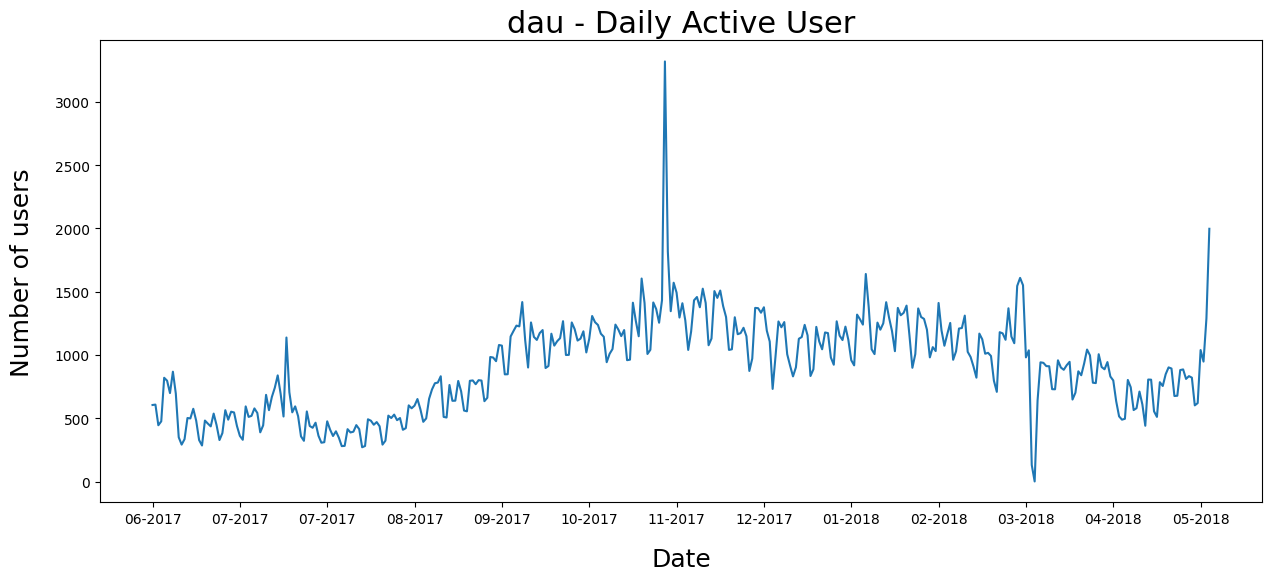

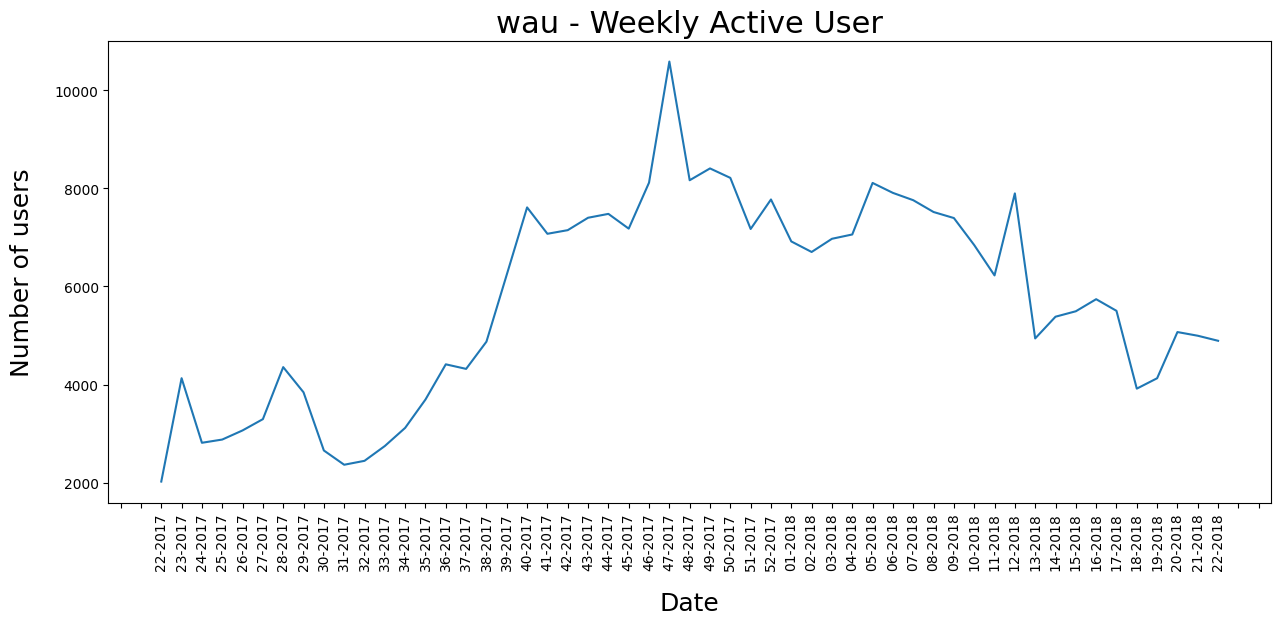

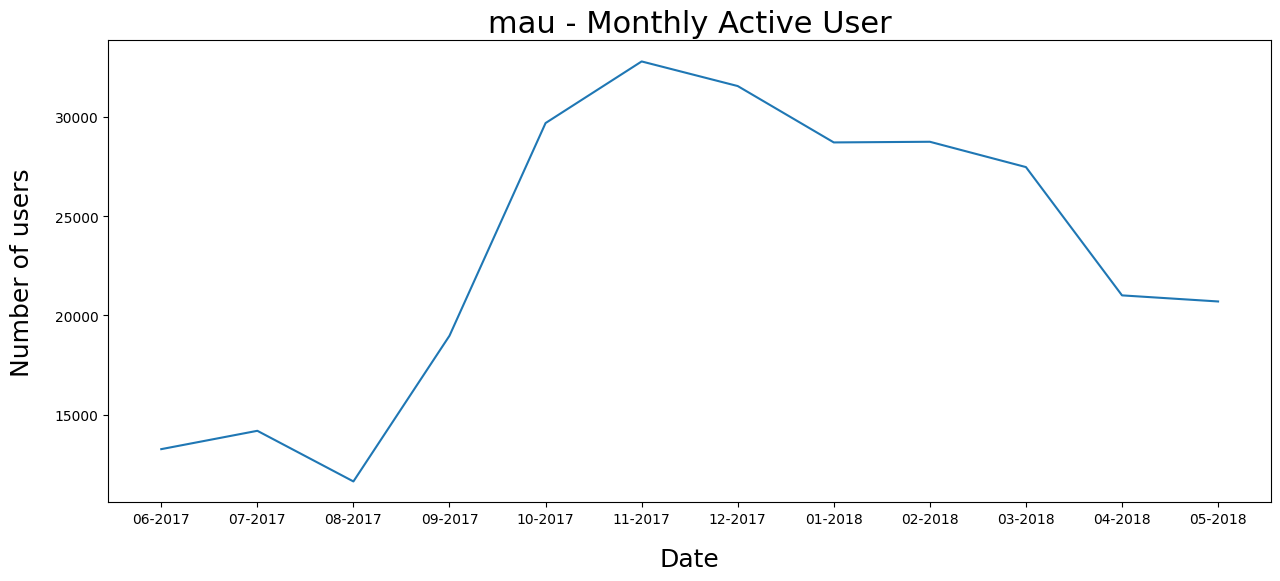

In [20]:
# Using the custom function
user_graph(dau,wau,mau)

When we look at the graph, three points stand out:

DAU - Daily Active User

On average, the websites have higher visitor traffic in three quarters of the year. Only in the summer months the traffic decreases. Thus, this graph of daily active users proves the thesis of a "summer hole".
December shows the highest traffic. This is an indicator that December is the most important month for the company from an economic point of view. It would therefore be advisable to ensure sufficient computing power in this month to avoid overloading the website.
April 2018 shows a drastic drop in the number of visitors. Such a spike in the graph usually indicates a server failure or some other technical problem.
WAU - Weekly Active User

In our data set, we have data from two different fiscal years. If we did not differentiate the data in the fiscal year, we would have a continuous graph, but it would show the values in a distorted form.

Despite the division into fiscal years, we can still find our assumptions from the DAU here:

Activity on the platform increases with the onset of the fall months, peaks in December, and declines again toward the summer months.
MAU - Monthly Active User

As with WAU, we need to distinguish between fiscal years in Monthly Active Users.

What we can also observe is the coarser we look in the activities, the less the graph strikes out.

This means that events that take place in an event horizon of less than a week disappear in the mass of a MAU view. The smaller the event horizon, the more inconspicuous the graph in a DAU view.

4.1.2 User Session per day

In [21]:
fig = px.line(visits.groupby(visits['day'])['uid'].nunique().reset_index(),
              x="day", y="uid", title="Daily Visits to Yandex Afisha")

fig.update_layout(
    showlegend=True,
    margin=dict(t=30, l=8, b=8, r=10))

fig.show()

print("Date with the highest number of visit is", visits.groupby(visits['day'])['uid']\
      .nunique().reset_index().sort_values(by="uid", ascending=False).iloc[0, 0])

print("Date with the lowest number of visit is", visits.groupby(visits['day'])['uid']\
      .nunique().reset_index().sort_values(by="uid", ascending=True).iloc[0, 0])

Date with the highest number of visit is 2017-11-24 00:00:00
Date with the lowest number of visit is 2018-03-31 00:00:00


This graph is particularly interesting. It not only shows the daily visits to the platform, but also provides an insight into the

The annual business,
advertising and acquisition performance,
Seasonal ups and downs
and server performances
Since this chart shows the visitor on the daily basis, you can also click this link to go a bit deeper and explore the average visutors on a hourly basis.

Whilst the day with the highest number of visitors is 24/11/2017, there seems to have been a crash in visitors on 31/03/2018.

We know from our previous dau calculation that the average number of daily unique visitors is 907. This means that the number of visitors on 31.03.2018 is clearly below the average.

The resulting conclusion is that there must have been a technical malfunction in the servers or in some other critical infrastructure of the platform.

4.1.3 Sessions v.s. visits per day

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=visits.groupby(visits['day'].dt.date)['uid'].nunique().reset_index()['day'], 
                        y=visits.groupby(visits['day'].dt.date)['uid'].nunique().reset_index()['uid'],
                    mode='lines',
                    name='DAU',line = dict(color='orange', width=2 )))

fig.add_trace(go.Scatter(x=visits.groupby(visits['day'].dt.date)['uid'].count().reset_index()['day'], 
                        y=visits.groupby(visits['day'].dt.date)['uid'].count().reset_index()['uid'],
                    mode='lines',
                    name='sessions',line = dict(color='black', width=2 )))


fig.update_layout(
    showlegend=True,
    plot_bgcolor="lightblue",
    margin=dict(t=30,l=8,b=8,r=10),title= "Sessions Per Day Vs Visits Per Day")



Let's compare this graph with the previous one. While the top graph shows the daily unique visitors, in this graph we compare these unique visitors with the number of sessions on the platform.

From this graph we can see that visitors and sessions are almost always the same. In order to proof that thesis, we'll focus our calculation on the average session per user below.

4.1.4 Average Session per User

In [23]:
sessions_per_user = visits.groupby('day').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display((sessions_per_user.sort_values(ascending= True, by= 'sessions_per_user').head(3).reset_index()),
       (sessions_per_user.sort_values(ascending= False, by= 'sessions_per_user').head(3).reset_index())
)
print()
print("Average session Per Day:",sessions_per_user['sessions_per_user'].mean())

,day,n_sessions,n_users,sessions_per_user
0,2018-03-31,1,1,1.00
1,2018-03-30,134,131,1.02
2,2017-08-19,300,292,1.03


,day,n_sessions,n_users,sessions_per_user
0,2017-11-24,4042,3319,1.22
1,2017-11-28,1746,1493,1.17
2,2017-11-25,2089,1817,1.15



Average session Per Day: 1.082169644003972


No graph, just raw numbers.

First things first, we see that the average number of user sessions per day is just over 1, which confirms our previous assumption.

Let's also look at the peak and the lowest point of the session per user. We can see that during the high season of the business, users are still struggling with their consideration and it does not come to a direct purchase within the first session.

Let's also take a look at the lowest numbers of user sessions. It seems that there was one user session on the day of the server failure. The suspicion is that the server failure could be the result of web scraping or a DDOS attack. In this case, the product team shall have to consider additional security measures.

4.1.5 Length of each session

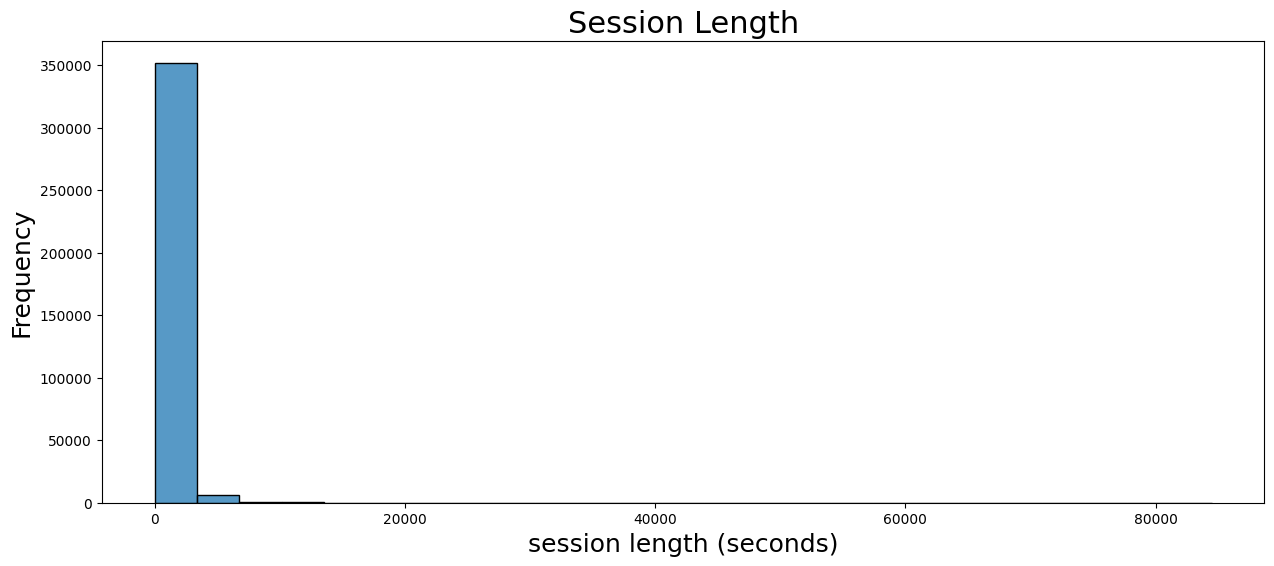

comparring mean, median and mode:

by choosing mean, we receive:   643.506488592098
by choosing median, we receive: 300.0
by choosing mode, we receive:   60


In [24]:
visits['session_length_sec'] = (visits['end_ts']- visits['start_ts']).dt.seconds


fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.histplot( x= "session_length_sec", bins =25, data=visits)  
ax.set_title("Session Length", fontdict={"size":22})
plt.xlabel("session length (seconds)", fontdict={"size":18})
plt.ylabel("Frequency", fontdict={"size":18})
plt.show()

print('comparring mean, median and mode:')
print()
print(f'by choosing mean, we receive:   {visits.session_length_sec.mean()}')
print(f'by choosing median, we receive: {visits.session_length_sec.median()}')
print('by choosing mode, we receive:   {}'.format(int(visits['session_length_sec'].mode())))

Above, we can see why we should use mode when calculating the length of each session: Hence the Session length is highly skewed.


4.1.6 Sessions by device type

In [25]:
visits['session_length']=((pd.to_datetime(visits['end_ts'])-visits['start_ts'])/ np.timedelta64(1, 'm')).round()
fig = px.line(visits.groupby([visits['start_ts'].dt.date,'device'])['session_length'].mean().reset_index(),
              x="start_ts", y="session_length",color='device', title = "Sessions by Device Type")
fig.update_layout(
    showlegend=True,plot_bgcolor="gray",
    margin=dict(t=30,l=8,b=8,r=10))
fig.show()

Again, we clearly see the peak of business in November, as well as the downfall end of March 2018.

When we look at session duration by device, we notice that users of the platform via mobile devices, noted here under "touch" , linger between 3-5 seconds shorter.

The lower dwell time could be due to a good UX on the mobile website. The longer dwell time via "desktop" could be related to the navigation of the cursor.

All in all, the dwell time is within reason. It is neither close to zero, nor in the range of minutes.

4.1.7 Cohorts: User retention

In [26]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
# Drop the existing column to avoid overlap
if 'first_activity_date' in visits.columns:
    visits = visits.drop(columns=['first_activity_date'])
visits = visits.join(first_activity_date, on='uid')

visits['activity_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()
visits['first_month'] = visits['first_activity_date'].dt.to_period('M').dt.to_timestamp()

# Calculate cohort_lifetime as the difference in months between activity_month and first_month
visits['cohort_lifetime'] = ((visits['activity_month'].dt.year - visits['first_month'].dt.year) * 12 +
                             (visits['activity_month'].dt.month - visits['first_month'].dt.month))

cohorts = (visits.groupby(['first_month', 'cohort_lifetime'])
           .agg({'uid': 'nunique'})
           .reset_index())

initial_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_visits_count, on='first_month')

cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Convert first_month to string format only after all operations are complete
cohorts['first_month'] = cohorts['first_month'].dt.strftime('%Y-%m')

retention_pivot = cohorts.pivot_table(index='first_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

#cohorts

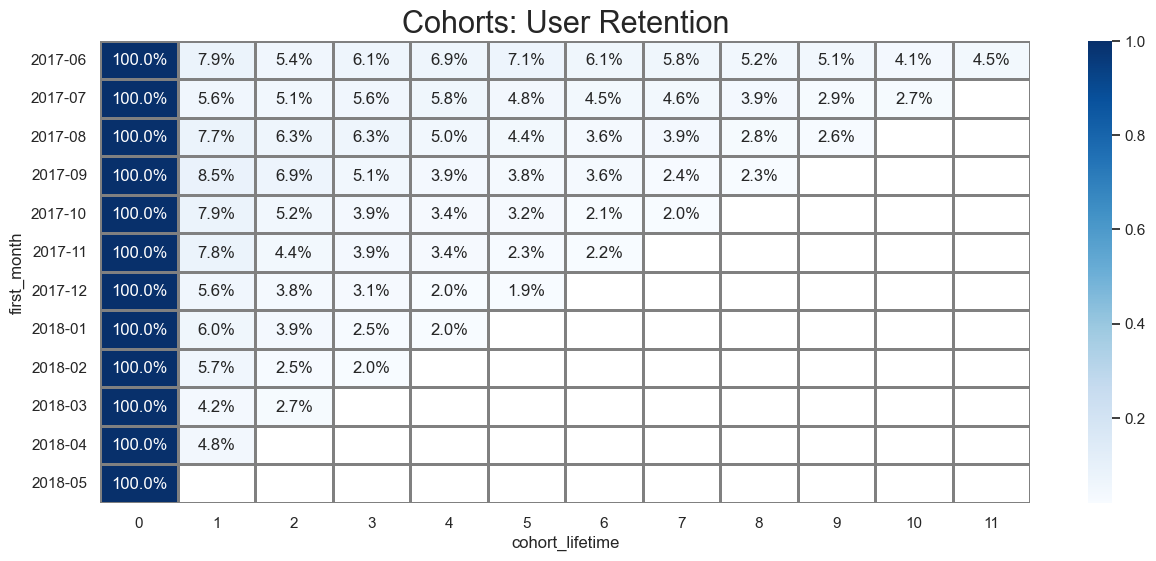

In [27]:
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Cohorts: User Retention', size= 22)
heatmap = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'Blues')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation= 0)
plt.show()

In [28]:
sticky_wau = dau.mean() / wau.mean() * 100
sticky_mau = dau.mean() / mau.mean() * 100
print(f"Sticky factor weekly: {round(int(sticky_wau))} %")
print(f"Sticky factor Monthly: {round(int(sticky_mau))} %")

Sticky factor weekly: 15 %
Sticky factor Monthly: 3 %


The June 2017 cohort had the highest retention rate as at month 11 (and the only month that had a rentention rate as at month 11). By the first month (month 1), all cohorts had retention rates less than 10%. None of the May 2018 cohort came back after their first visit. About 4.8% of the April 2018 cohort only came back in month 1.

Comparring that to the sticky factor, we can see that only about 16% of users come back in a week, and about 3% of users come back in a month

---

4.2 On Sales

4.2.1 When do people start buying?

4.2.2 How many orders do they make during a given period of time?
4.2.2.1 Purchases on hourly bases
4.2.2.2 Count of purchases by month

4.2.3 LVT Cohort analysis with heatmap
4.2.4 LVT by Source

4.2.1 When do people start buying?

In [29]:
min_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
min_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
actual_first_visit=min_visit.merge(min_order,on=['uid'],how='left')
actual_first_visit.rename(columns={'start_ts':'first_visit'},inplace=True)
actual_first_visit

,uid,first_visit,buy_ts
0,11863502262781.00,2018-03-01 17:27:00,NaT
1,49537067089222.00,2018-02-06 15:55:00,NaT
2,297729379853735.00,2017-06-07 18:47:00,NaT
3,313578113262317.00,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679.00,2017-09-30 14:29:00,NaT
...,...,...,...
228164,18446403737806311424.00,2017-11-30 03:36:00,NaT
228165,18446424184725331968.00,2017-12-06 20:32:00,NaT
228166,18446556406699108352.00,2018-01-01 16:29:00,NaT
228167,18446621818809591808.00,2017-12-27 13:27:00,NaT


In [30]:
clean_dict = visits.groupby(['uid'])['source_id'].nunique().reset_index().query('source_id==1')
#clean_dict

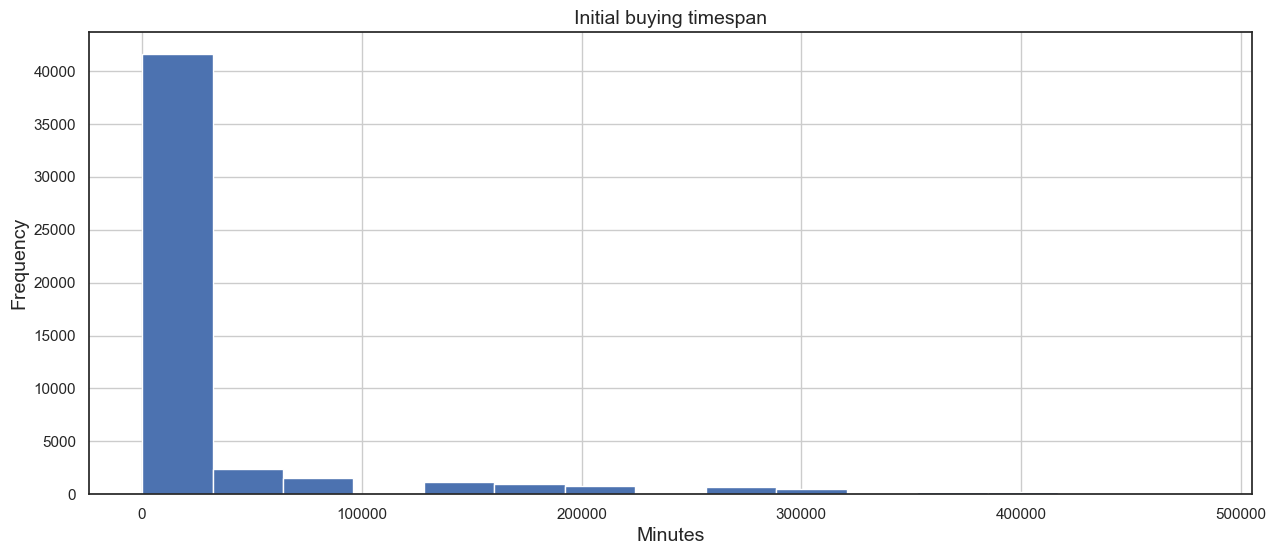

Minutes: 0


In [31]:
# grouping order dataset by month
orders['order_month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_month']

# merging first orders and orders
orders_ = pd.merge(orders,first_orders, on='uid')


orders_['span'] = (orders_['order_month'] - orders_['first_month']) / np.timedelta64(1, 'm')
orders_['span'] = orders_['span'].round().astype('int')
orders_['span'].hist(figsize=(15,6), bins= 15)

plt.title("Initial buying timespan", fontdict={"size":14})
plt.xlabel("Minutes", fontdict={"size":14})
plt.ylabel("Frequency", fontdict={"size":14})
plt.show()
print("Minutes:", round(int(orders_['span'].mode())))

On average, people start buying within 0 minutes (immediately) on the Yandex.afisha.

4.2.2 How many orders do they make during a given period of time?

4.2.2.1 Purchases on hourly bases

In [32]:
def purchases_hours(orders):


    function_list = ['count', 'sum']
    
    purchase_hours = orders.copy()
    purchase_hours['buy_ts'] = purchase_hours['buy_ts'].astype('datetime64[ns]')
    purchase_hours['purchase_hour'] = purchase_hours['buy_ts'].dt.hour.astype(str).str.zfill(2)
    
    for x in function_list:
        sns.set_theme(style="darkgrid")
        fig, ax = plt.subplots()
        fig.set_size_inches(16, 10)
        
        if x == 'count':
            purchase_hours2 = purchase_hours.groupby('purchase_hour')['revenue'].count().reset_index()
            purchase_hours2.rename(columns={'revenue': 'count'}, inplace=True)
            
            norm = mcolors.Normalize(vmin=purchase_hours2['count'].min(), vmax=purchase_hours2['count'].max())
            colors = cm.Blues(norm(purchase_hours2['count']))
            
            splot = sns.barplot(x="count", y="purchase_hour", data=purchase_hours2, palette=colors)
            ax.set_title("Number of Visitors per Hour", fontdict={"size": 22})
            plt.ylabel("Hour", fontdict={"size": 18})
            ax.get_xaxis().set_visible(False)
            
            # Highlight top 3 values with light green font color
            top_3_indices = purchase_hours2['count'].nlargest(3).index
            for i, p in enumerate(splot.patches):
                width = p.get_width()
                color = 'skyblue' if i in top_3_indices else 'black'
                plt.text(width + 5, p.get_y() + 0.5 * p.get_height(),
                         int(width), ha='center', va='center', weight='bold', color=color)
            
            # Add a dashed line for the median
            median_count = np.median(purchase_hours2['count'])
            ax.axvline(median_count, color='lightgrey', linestyle='--', alpha=0.5)
            plt.text(median_count + 5, len(purchase_hours2) - 1, f'Median: {int(median_count)}', 
                     color='grey', alpha= 0.9, fontsize=10, weight='bold')
        
        else:
            purchase_hours1 = purchase_hours.groupby('purchase_hour')['revenue'].sum().reset_index()
            purchase_hours1.rename(columns={'revenue': 'sum'}, inplace=True)
            
            norm = mcolors.Normalize(vmin=purchase_hours1['sum'].min(), vmax=purchase_hours1['sum'].max())
            colors = cm.Blues(norm(purchase_hours1['sum']))
            
            splot = sns.barplot(x="sum", y="purchase_hour", data=purchase_hours1, palette=colors)
            ax.set_title("Revenue per Hour", fontdict={"size": 22})
            plt.ylabel("Hour", fontdict={"size": 18})
            ax.get_xaxis().set_visible(False)
            
            # Highlight top 3 values with light green font color
            top_3_indices = purchase_hours1['sum'].nlargest(3).index
            for i, p in enumerate(splot.patches):
                width = p.get_width()
                color = 'skyblue' if i in top_3_indices else 'black'
                plt.text(width + 5, p.get_y() + 0.5 * p.get_height(),
                         f"${width:,.2f}".replace(',',"'"), ha='center', va='center', weight='bold', color=color)
            
            # Add a dashed line for the median
            median_sum = np.median(purchase_hours1['sum'])
            ax.axvline(median_sum, color='lightgrey', linestyle='--', alpha=0.5)
            plt.text(median_sum + 5, len(purchase_hours1) - 1, f'Median: ${median_sum:.2f}', 
                     color='grey', alpha= 0.9, fontsize=10, weight='bold')
            ax.legend(fontsize=14)
        
        plt.show()

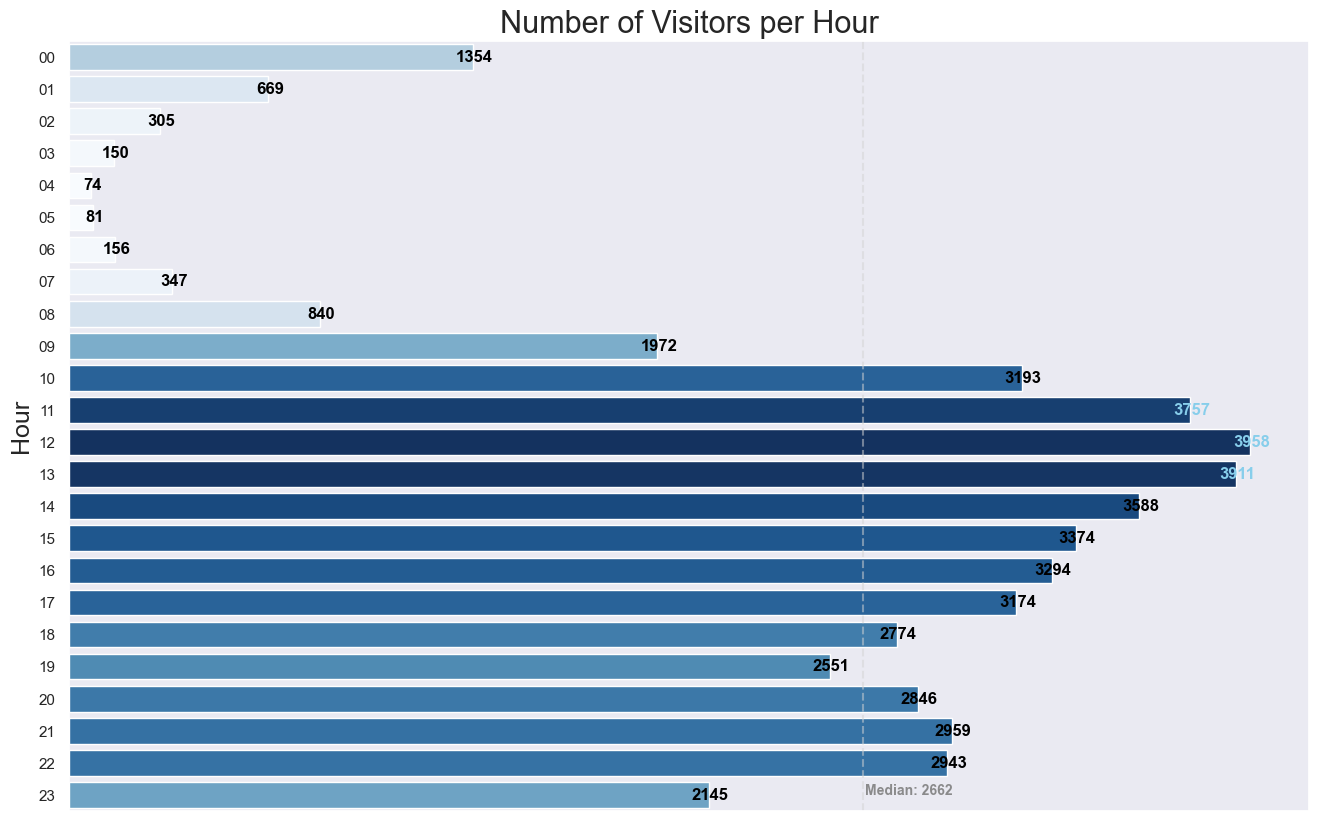

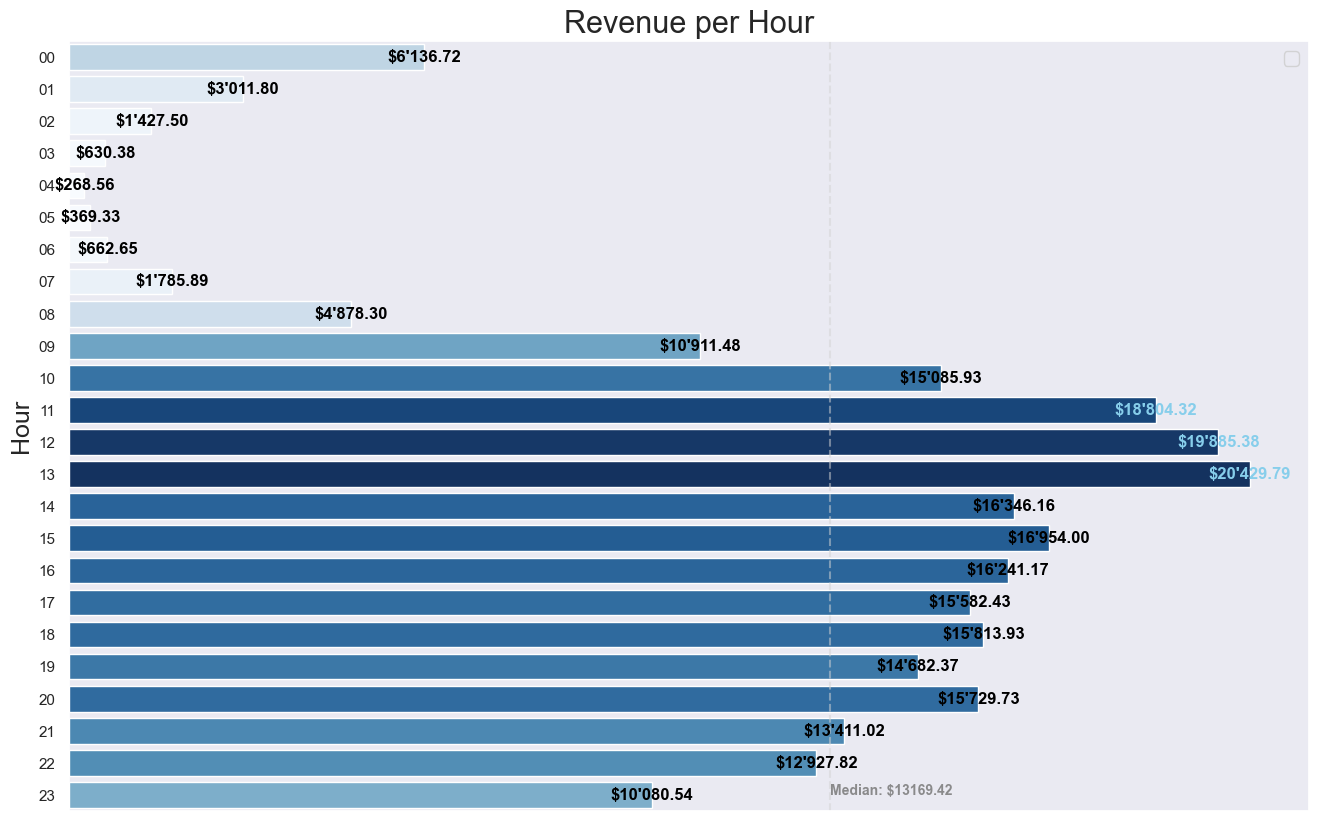

In [33]:
purchases_hours(orders_)

More than a third (37%) of the total purchase within a day are made between 11-15 PM. More than a third of the purchase are made within a sixth of the day. At the same time between 3-6 AM, only a few purchases take place on the platform during that time. Only 0.91% of all purchase in a day are made in those hours.

4.2.2.2 Count of purchases by month

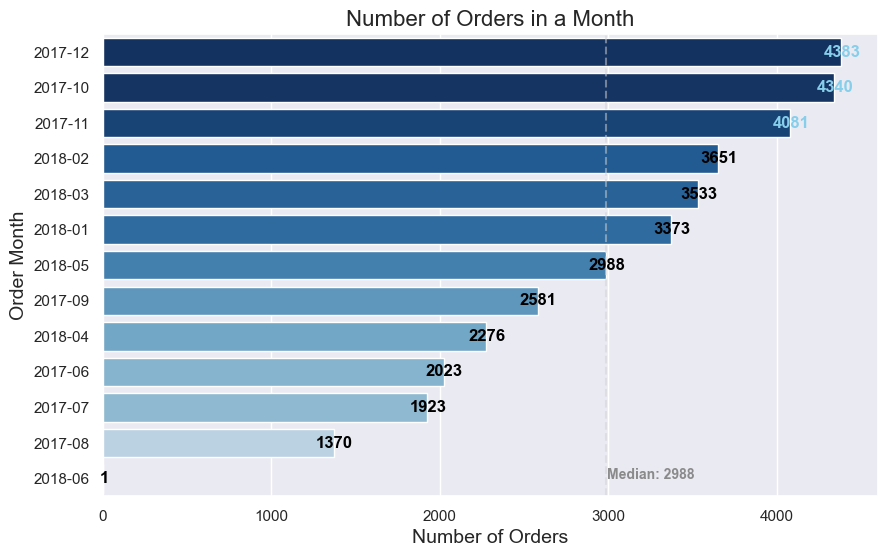

,first_month,n_buyers
6,2017-12,4383
4,2017-10,4340
5,2017-11,4081
8,2018-02,3651
9,2018-03,3533
7,2018-01,3373
11,2018-05,2988
3,2017-09,2581
10,2018-04,2276
0,2017-06,2023


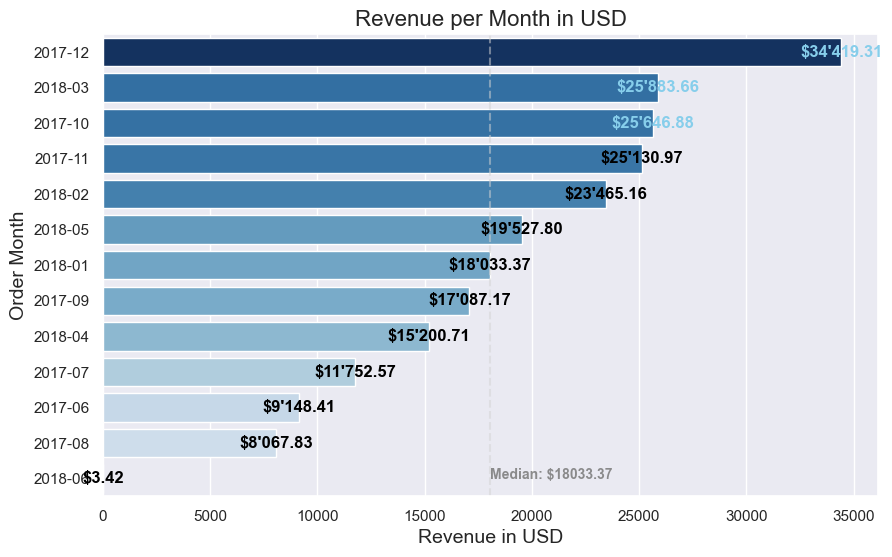

,first_month,revenue
6,2017-12,34419.31
9,2018-03,25883.66
4,2017-10,25646.88
5,2017-11,25130.97
8,2018-02,23465.16
11,2018-05,19527.80
7,2018-01,18033.37
3,2017-09,17087.17
10,2018-04,15200.71
1,2017-07,11752.57


Total revenue: $252'057.20
Average purchase size: $5.00


In [34]:
# calculating n buyers per month
cohort_sizes = first_orders.groupby('first_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_month', 'n_buyers']
cohort_sizes['first_month'] = cohort_sizes['first_month'].dt.strftime('%Y-%m')

# plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))  # Reduced figure size
cohort_sizes_sorted = cohort_sizes.sort_values(ascending=False, by="n_buyers")
norm = mcolors.Normalize(vmin=cohort_sizes_sorted["n_buyers"].min(), vmax=cohort_sizes_sorted["n_buyers"].max())
colors = cm.Blues(norm(cohort_sizes_sorted["n_buyers"]))

splot = sns.barplot(y="first_month", x="n_buyers", data=cohort_sizes_sorted, palette=colors)
ax.set_title("Number of Orders in a Month", fontdict={"size": 16})
plt.xlabel("Number of Orders", fontdict={"size": 14})
plt.ylabel("Order Month", fontdict={"size": 14})

# Highlight top 3 values with skyblue font color
top_3_values = cohort_sizes_sorted.nlargest(3, "n_buyers")["n_buyers"].values
for i, p in enumerate(splot.patches):
    width = p.get_width()
    color = 'skyblue' if width in top_3_values else 'black'
    plt.text(width + 5, p.get_y() + 0.5 * p.get_height(),
             int(width), ha='center', va='center', weight='bold', color=color)

# Add a dashed line for the median
median_buyers = np.median(cohort_sizes_sorted["n_buyers"])
ax.axvline(median_buyers, color='lightgrey', linestyle='--', alpha=0.5)
plt.text(median_buyers + 5, len(cohort_sizes_sorted) - 1, f'Median: {int(median_buyers)}', 
         color='grey', alpha=0.9, fontsize=10, weight='bold')

plt.show()
display(cohort_sizes_sorted)

# calculating revenue per month
first_orders_rev = orders.groupby(['uid', 'revenue']).agg({'order_month': 'min'}).reset_index()
first_orders_rev1 = first_orders_rev.groupby('order_month').agg({'revenue': 'sum'}).reset_index()
first_orders_rev1.columns = ['first_month', 'revenue']
first_orders_rev1['first_month'] = first_orders_rev1['first_month'].dt.strftime('%Y-%m')

# plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))  # Reduced figure size
first_orders_rev1_sorted = first_orders_rev1.sort_values(ascending=False, by="revenue")
norm = mcolors.Normalize(vmin=first_orders_rev1_sorted["revenue"].min(), vmax=first_orders_rev1_sorted["revenue"].max())
colors = cm.Blues(norm(first_orders_rev1_sorted["revenue"]))

splot = sns.barplot(y="first_month", x="revenue", data=first_orders_rev1_sorted, palette=colors)
ax.set_title("Revenue per Month in USD", fontdict={"size": 16})
plt.xlabel("Revenue in USD", fontdict={"size": 14})
plt.ylabel("Order Month", fontdict={"size": 14})

# Highlight top 3 values with skyblue font color
top_3_values = first_orders_rev1_sorted.nlargest(3, "revenue")["revenue"].values
for i, p in enumerate(splot.patches):
    width = p.get_width()
    color = 'skyblue' if width in top_3_values else 'black'
    plt.text(width + 5, p.get_y() + 0.5 * p.get_height(),
             f"${width:,.2f}".replace(',',"'"), ha='center', va='center', weight='bold', color=color)


# Add a dashed line for the median
median_revenue = np.median(first_orders_rev1_sorted["revenue"])
ax.axvline(median_revenue, color='lightgrey', linestyle='--', alpha=0.5)
plt.text(median_revenue + 5, len(first_orders_rev1_sorted) - 1, f'Median: ${median_revenue:.2f}', 
         color='grey', alpha=0.9, fontsize=10, weight='bold')

plt.show()
display(first_orders_rev1_sorted)

print(f"Total revenue: ${orders_.revenue.sum():,.2f}".replace(',',"'")) 
print(f"Average purchase size: ${orders_.revenue.mean():,.2f}".replace(',',"'"))

On December 2017, users made about 4400 orders. This is followed by October 2017, and November 2017. Implying users order more during or a period getting to christmas. The months June, July, and August have the least number of orders. In the summer, users go on holidays and do not enjoy the platform a lot.

Also, on average, the purchase size is 5.00 USD

4.2.3 Count of purchases by cohort age

In [35]:
cohort_size = orders_.groupby('first_month').agg({'uid': 'nunique'}).reset_index().rename(columns={'uid': 'n_buyers'})
cohorts= orders_.groupby(['first_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

first_orders_counta = orders_.groupby('uid').agg({'revenue': 'count'}).reset_index()

user_lvt_age = orders_.groupby('uid').agg({'order_month': 'min'}).reset_index().rename(columns={'order_month': 'first_month'})
cohorts_sb= orders_.groupby(['uid','first_month', 'order_month']).agg({'revenue': 'count'}).reset_index()
uid_order_count = pd.merge(cohorts,cohort_size, on='first_month')

sb_orders_ = orders_.groupby(['uid','order_month','first_month']).agg({'revenue':'count'}).reset_index()
sb_orders_['cohort_age'] = ((sb_orders_['order_month'].dt.year - sb_orders_['first_month'].dt.year) * 12 +
							(sb_orders_['order_month'].dt.month - sb_orders_['first_month'].dt.month))



sb_orders_final = sb_orders_.groupby('uid').agg({'cohort_age': 'max', 'revenue': 'max'}).reset_index()


#display(sb_orders_final['uid'].value_counts(),sb_orders_final['cohort_age'].value_counts(),
#        sb_orders_final['revenue'].value_counts(),
#       sb_orders_final.sort_values(by= 'revenue', ascending= False))

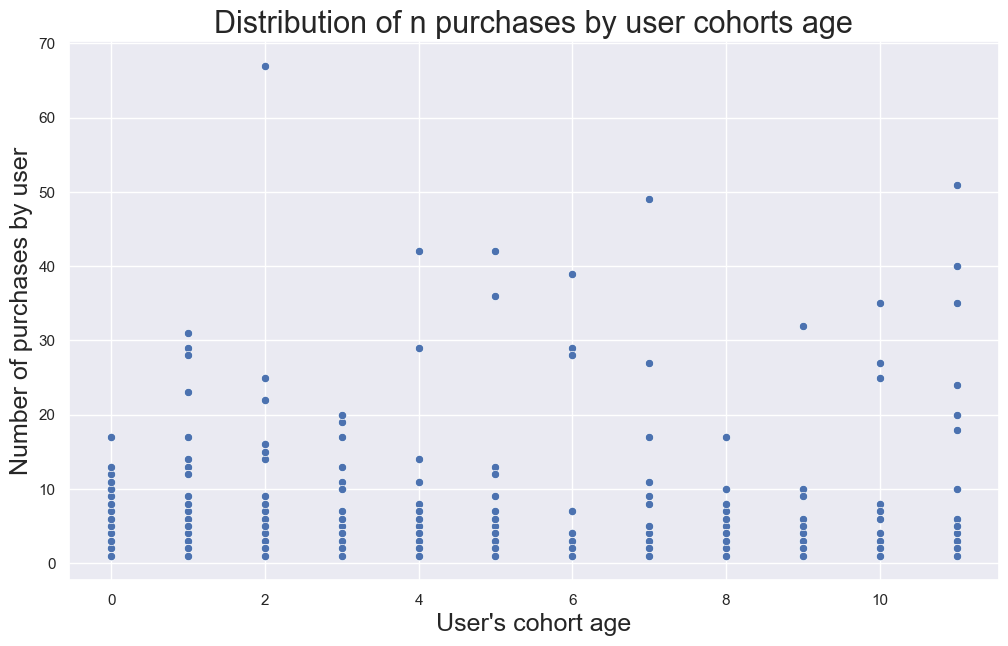

,uid,cohort_age,count of purchases
12332,6166747268563049472.00,2,67
27482,13888745432979763200.00,11,51
11014,5539673724080480256.00,7,49
20471,10343016064897449984.00,5,42
10770,5428360267575446528.00,4,42
23600,11920452646463903744.00,11,40
13862,6948781160947905536.00,6,39
14033,7046737606684150784.00,5,36
7206,3644482766749212160.00,11,35
6922,3501596628378158592.00,10,35


In [36]:
plt.figure(figsize=(12, 7))
scatter_sb = sns.scatterplot(x= 'cohort_age', y= 'revenue', data= sb_orders_final)

plt.title('Distribution of n purchases by user cohorts age', fontdict={"size":22})
plt.xlabel("User's cohort age", fontdict={"size":18})
plt.ylabel("Number of purchases by user", fontdict={"size":18})

#plt.grid()
plt.show()

table42 = sb_orders_final.sort_values(by= 'revenue', ascending= False).head(10)
table43 = table42.rename(columns={'revenue': 'count of purchases'})
display(table43)

Due to the distribtion chart, we can see that we definatly have fans of the yandex afisha platform, even at early lifecycle stage.

4.2.3.1 AVG number of orders by a user

In [37]:
print((sb_orders_final['revenue'].sum()/sb_orders_final['uid'].count()).round(5))

1.18386


It seems the average customer orders a bit over of 1 time. That indicates, the roughly 80-90% didn't stick to our product and we should taking actions into consideration to increase the customer retention.

4.2.3 LVT Cohort analysis with heatmap

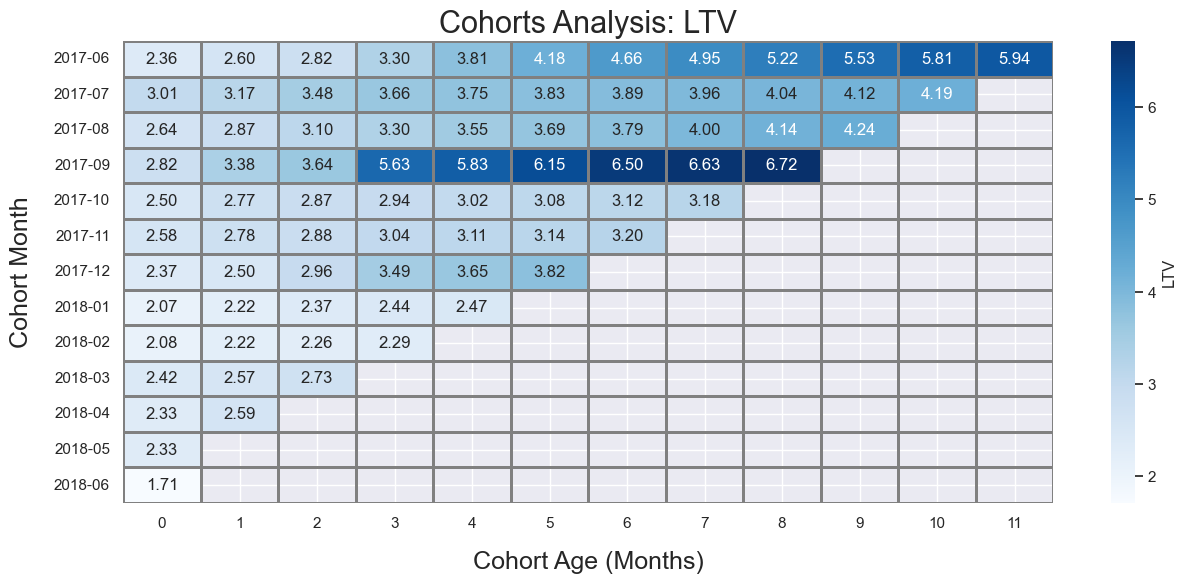

In [38]:
# Ensure the 'first_month' and 'order_month' columns are in datetime format (if not already)
cohort_size['first_month'] = pd.to_datetime(cohort_size['first_month'])
cohorts['first_month'] = pd.to_datetime(cohorts['first_month'])
cohorts['order_month'] = pd.to_datetime(cohorts['order_month'])

# Merge the DataFrames
monthly_orders = pd.merge(cohorts, cohort_size, on='first_month')

margin_rate = .5

# Calculate gross profit (gp) and other metrics
monthly_orders['gp'] = monthly_orders['revenue'] * margin_rate
# Calculate the age in months
monthly_orders['age'] = ((monthly_orders['order_month'].dt.year - monthly_orders['first_month'].dt.year) * 12 +
                         (monthly_orders['order_month'].dt.month - monthly_orders['first_month'].dt.month))

monthly_orders['ltv'] = monthly_orders['gp'] / monthly_orders['n_buyers']

# Create the pivot table for LTV analysis
ltv_pivot = monthly_orders.pivot_table(
    index=monthly_orders['first_month'].dt.strftime('%Y-%m'), 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1)

# Plot the heatmap
plt.figure(figsize=(15, 6))
plt.title('Cohorts Analysis: LTV', size=22)
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap='Blues', cbar_kws={'label': 'LTV'})
plt.xlabel('Cohort Age (Months)', fontsize=18, labelpad=15)
plt.ylabel('Cohort Month', fontsize=18, labelpad=15)
plt.show()

The June 2017 cohort had the longest duration of LTV (upto age 11), thus, contributed the longest time. However, the September 2017 cohort had the highest LTV (cummulative sum of 6.15 over six m, in the nineth month (age 8), i.e. an LTV of about dollars; this was followed the December 2017 cohort (with about 24 dollars). The cohorts that had the least LTVs are May and June 2018.

---

4.3 Marketing

4.3.1 Costs overall
4.3.2 Costs per Source
4.3.3 Costs over time
4.3.4 CAC by Source
4.3.5 CAC cohort analysis
4.3.6 ROI by Source
4.3.7 ROI by cohort
4.3.8 Comparring profit by Source

4.3.1 Costs overall

In [39]:
print(f'Total amount of costs: {costs.costs.sum():,.2f} USD'.replace(',',"'"))

Total amount of costs: 329'131.62 USD


Overall, about 329,131.62 USD was spent.

4.3.2 Costs per Source

In [40]:
# Check n sources
print(f'Number of sources: {int(costs.agg({"source_id": "nunique"}))}')

Number of sources: 7


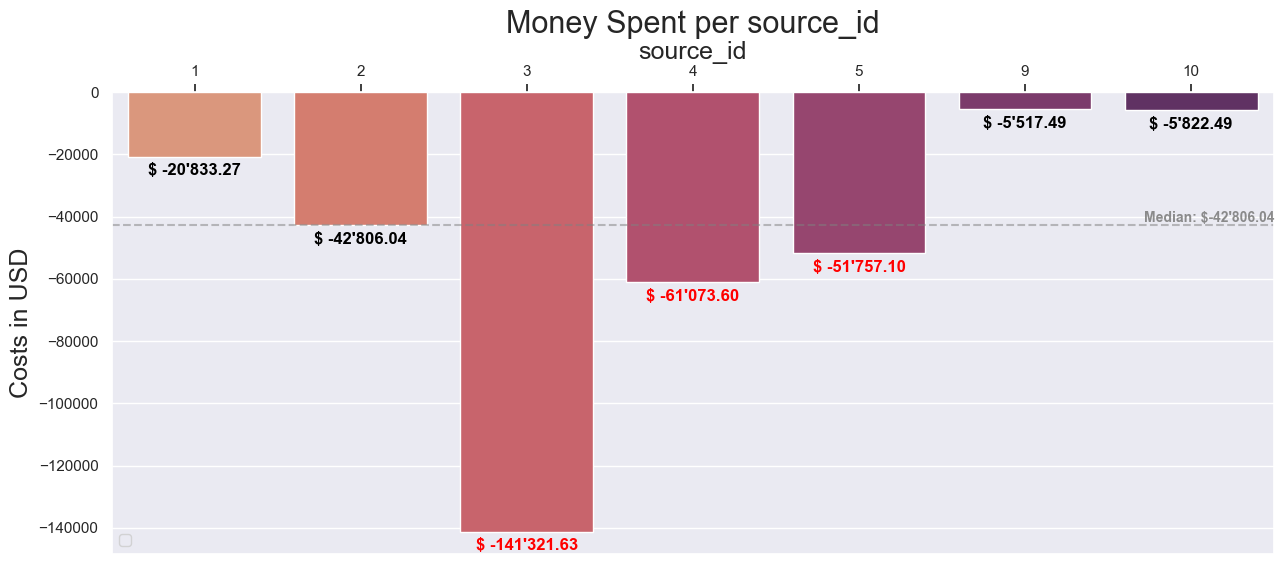

Money spent per source ID in USD:


,source_id,costs
0,1,-20833.27
1,2,-42806.04
2,3,-141321.63
3,4,-61073.60
4,5,-51757.10
5,9,-5517.49
6,10,-5822.49


In [41]:
per_source = costs.pivot_table(index="source_id", values="costs", aggfunc="sum").reset_index()
per_source.columns = ["source_id", "costs"]

# transform as negativ values, as we are interested in costs
per_source_neg = per_source.copy()
per_source_neg['costs'] = -per_source_neg['costs']

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
splot = sns.barplot(y="costs", x="source_id", data=per_source_neg, palette="flare")
ax.set_title("Money Spent per source_id", fontdict={"size": 22})
plt.xlabel("source_id", fontdict={"size": 18})
plt.ylabel("Costs in USD", fontdict={"size": 18})

# Move x-axis to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Add a horizontal line for the median
median_costs = per_source_neg['costs'].median()
plt.axhline(median_costs, color='grey', linestyle='--', alpha=0.5)

# Annotate the median value
plt.text(len(per_source_neg) - 0.5, median_costs, f'Median: ${median_costs:,.2f}'.replace(',', "'"),
         color='grey', alpha=0.9, fontsize=10, weight='bold', ha='right', va='bottom')
plt.legend()

# Highlight top 3 most negative values with red font color
top_3_negative_values = per_source_neg['costs'].nsmallest(3).values
for p in splot.patches:
    color = 'red' if p.get_height() in top_3_negative_values else 'black'
    splot.annotate(f"$ {p.get_height():,.2f}".replace(',', "'"),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -10),  # Adjusted to place annotations below the bars
                   textcoords='offset points', weight='bold', color=color)

plt.show()
print('Money spent per source ID in USD:')
display(per_source_neg)

There were about 7 different sources. The source that we spent most on is source number 3 ( about 141,000.00 USD). We spent less than 6,000.00 USD each on sources 9 and 10

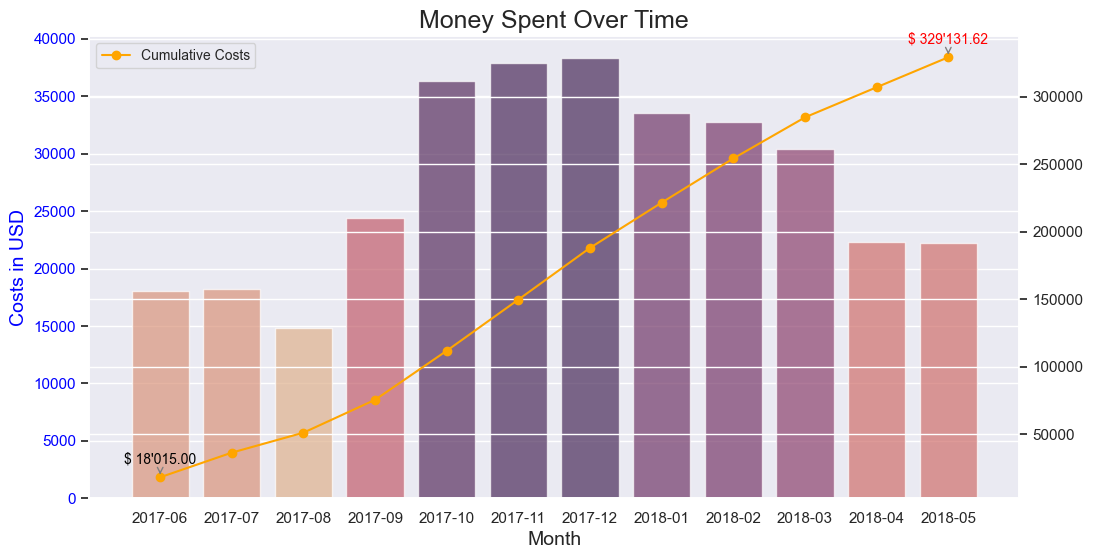

Money spent over time:


,cohort,costs,cumulative_costs
6,2017-12,38315.35,187961.15
5,2017-11,37907.88,149645.80
4,2017-10,36322.88,111737.92
7,2018-01,33518.52,221479.67
8,2018-02,32723.03,254202.70
9,2018-03,30415.27,284617.97
3,2017-09,24368.91,75415.04
10,2018-04,22289.38,306907.35
11,2018-05,22224.27,329131.62
1,2017-07,18240.59,36255.59


In [43]:
costs['cost_month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
costs['cost_month'] = costs['cost_month'].dt.strftime('%Y-%m')
over_time = costs.pivot_table(index = "cost_month", values="costs",aggfunc= "sum").reset_index()

# Calculate cumulative costs
over_time['cumulative_costs'] = over_time['costs'].cumsum()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Reduced figure size

# Plot the bars for costs
sns.barplot(x="cost_month", y="costs", data=over_time, ax=ax1, palette="flare", alpha=0.7, hue="costs", legend=False)
ax1.set_title("Money Spent Over Time", fontdict={"size": 18})
ax1.set_xlabel("Month", fontdict={"size": 14})
ax1.set_ylabel("Costs in USD", fontdict={"size": 14}, color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a second y-axis for the cumulative line chart
ax2 = ax1.twinx()
ax2.plot(over_time["cost_month"], over_time["cumulative_costs"], color="orange", marker="o", label="Cumulative Costs")
#ax2.set_ylabel("Cumulative Costs in USD", fontdict={"size": 14}, color="orange")
#ax2.tick_params(axis='y', labelcolor="orange", labelleft=False)

# hide the x-axis ticks for the second y-axis
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


# Annotate the first and last cumulative costs
first_cumulative = over_time["cumulative_costs"].iloc[0]
last_cumulative = over_time["cumulative_costs"].iloc[-1]
# Annotate the first cumulative cost
ax2.annotate(f"$ {first_cumulative:,.2f}".replace(',', "'"),
            xy=(0, first_cumulative),
            xytext=(0, 10),  # Adjusted to place the annotation above the point
            textcoords="offset points", 
            arrowprops=dict(arrowstyle="->", color="gray"),
            fontsize=10, color="black", ha="center")

# Annotate the last cumulative cost
ax2.annotate(f"$ {last_cumulative:,.2f}".replace(',', "'"),
             xy=(len(over_time) - 1, last_cumulative),
             xytext=(0, 10),  # Adjusted to place the annotation above the point 
             textcoords="offset points", 
             arrowprops=dict(arrowstyle="->", color="grey"),
             fontsize=10, color="red", ha="center")

# Add legend for the cumulative line chart
ax2.legend(loc="upper left", fontsize=10)

plt.show()
print('Money spent over time:')
display(over_time.rename(columns={'cost_month':'cohort'}).sort_values(ascending =False, by= "costs" ))

Over time, similar to orders, we spent most during December, November and October 2017, and Least in June, July and August 2017.

It can be concluded from this that the investment for advertising expenditure has increased cyclically and in relation to the high season of the business.

Let's compare the expenditure with the number of purchases (see chart) in the respective months:

This is what we got:

Month	Invest	Revenue
2017-12	38,315.35	34,419.31
2017-11	37,907.88	25,130.97
2017-10	36,322.88	25,646.88
2017-09	24,368.91	17,087.17
for 2018:

Month	Invest	Revenue
2018-03	30,415.27	25,883.66
As we will further explore, we cant focus on direct revenue from the same month we invest in marketing, as we need to consider at least two facts:

Usually, marketing investments like campaigns are taking at least a certain time to have an impact on Business's KPI (Key Performance Indicator)
For Business with a lower average shopping cart (purchase amount) per purchase, markeing investments will usually beginn to pay off once the acquirred customer comes back a + 2nd time, hence we will take a look at ROMI KPI at later stage click here to go to ROMI

4.3.4 CAC per month

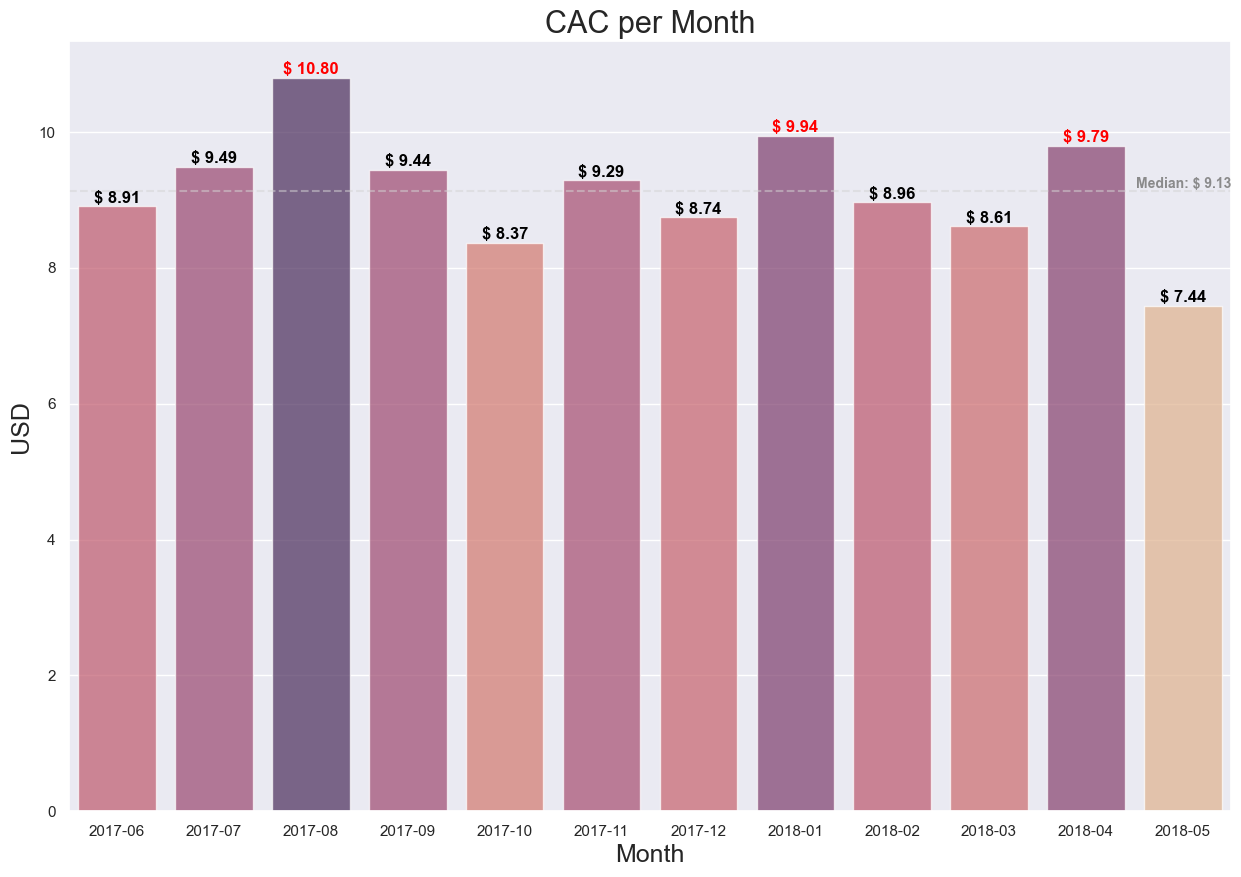

,cost_month,costs,first_month,uid,cac
0,2017-06,18015.00,2017-06-01,2023,8.91
1,2017-07,18240.59,2017-07-01,1923,9.49
2,2017-08,14790.54,2017-08-01,1370,10.80
3,2017-09,24368.91,2017-09-01,2581,9.44
4,2017-10,36322.88,2017-10-01,4340,8.37
5,2017-11,37907.88,2017-11-01,4081,9.29
6,2017-12,38315.35,2017-12-01,4383,8.74
7,2018-01,33518.52,2018-01-01,3373,9.94
8,2018-02,32723.03,2018-02-01,3651,8.96
9,2018-03,30415.27,2018-03-01,3533,8.61


In [44]:
# Determining CAC per month
cac_per_source_new = costs.groupby('cost_month').agg({'costs': 'sum'}).reset_index()
orders_grouped_uid = orders.groupby('uid')['order_month'].min().reset_index().\
                        rename(columns={'order_month': 'first_month'})
orders_grouped_firstm = orders_grouped_uid.groupby('first_month').\
                        agg({'uid': 'nunique'}).reset_index()

new_cac_table = cac_per_source_new.merge(orders_grouped_firstm, 
                                        left_index=True, 
                                       right_index=True)
new_cac_table['cac'] = new_cac_table['costs']/new_cac_table['uid']




# plot CAC per Month
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
splot = sns.barplot(x= 'cost_month', y= 'cac', data= new_cac_table, palette="flare", alpha=0.7, hue="cac", legend=False)
ax.set_title("CAC per Month", fontdict={"size":22})
plt.xlabel("Month", fontdict={"size":18})
plt.ylabel("USD", fontdict={"size":18})

# draw a horizontal line for the median
median_cac = new_cac_table['cac'].median()
plt.axhline(median_cac, color='lightgrey', linestyle='--', alpha=0.5)
plt.text(len(new_cac_table) - 0.5, median_cac, f'Median: $ {median_cac:,.2f}'.replace(',', "'"),
         color='grey', alpha=0.9, fontsize=10, weight='bold', ha='right', va='bottom')


for p in splot.patches:
    # Highlight top 3 costs with red font color
    color = 'red' if p.get_height() in new_cac_table['cac'].nlargest(3).values else 'black'
    splot.annotate(f"$ {p.get_height():,.2f}", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= (0, 6), 
                   textcoords = 'offset points', weight='bold', color=color)
    


plt.show()
display(new_cac_table)

We can see that the company spends the highest amount for the customer acquisition during August 2017. And there could be 2 reasons for that pattern.

1) The Marketing-Team had invested their budget with an anti-cyclical focus, as the high season of the business is during end of the year, while low-season is during summer time

2) Marketing-Investments usually taking their time to thrive. If we assume the time for their campaign in August took to month to deliver first results, then we technically had an explanation for the increasing traffic on the plattform starting at Oktober 2017

4.3.5 CAC by Source

In [45]:
#Calculate unique source for each user from the visit table.

sb_source_count1 = visits.groupby(['uid']).agg({'source_id':['count','nunique','min']}).reset_index()
sb_source_count1.columns = ['uid','source_count','source_unique','source_id_single']
# Getting only those users who have single source
user_source_single1 = sb_source_count1[sb_source_count1.source_unique==1]


#Getting Users who have multiple sources and then find/update most common source for each user.
user_source_multi1 = sb_source_count1[sb_source_count1.source_unique>1].merge(visits[['uid','source_id']], on='uid', how='inner')
user_source_multi1 = user_source_multi1.groupby(['uid'])['source_id'].agg(lambda x: x.mode()[0]).reset_index()



#remove all duplicate record.
user_source_single1.rename(columns={'source_id_single':'source_id'},inplace=True)
user_source_single1 = user_source_single1[['uid','source_id']]
user_source_single1 = user_source_single1.drop_duplicates()
#remove all duplicate record.
user_source_multi1 = user_source_multi1.drop_duplicates().reset_index()
#append tables.
user_source_final1 = pd.concat([user_source_single1, user_source_multi1], ignore_index=True)
user_source_final1 = user_source_final1[['uid','source_id']].drop_duplicates().reset_index()




#cost by source for each depositor

sb_expenses_bySource = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
df_cum_count = pd.merge(orders[['uid']],user_source_final1, on='uid',how='inner')
data_lorum_bySource = df_cum_count.groupby('source_id').agg({'uid':'nunique'})
sb_data_cac_dep_final = sb_expenses_bySource.merge(data_lorum_bySource, on='source_id', how='left')
sb_data_cac_dep_final['cost_per_customer'] = sb_data_cac_dep_final['costs']/sb_data_cac_dep_final['uid']


display(user_source_final1, sb_data_cac_dep_final)

,index,uid,source_id
0,0,11863502262781.00,3
1,1,49537067089222.00,2
2,2,297729379853735.00,3
3,3,313578113262317.00,2
4,4,325320750514679.00,5
...,...,...,...
228164,228164,18445407535914412032.00,3
228165,228165,18445456946869448704.00,3
228166,228166,18445601152732272640.00,2
228167,228167,18445884613277159424.00,1


,source_id,costs,uid,cost_per_customer
0,1,20833.27,5058,4.12
1,2,42806.04,5181,8.26
2,3,141321.63,9316,15.17
3,4,61073.60,9324,6.55
4,5,51757.10,5640,9.18
5,9,5517.49,1008,5.47
6,10,5822.49,995,5.85


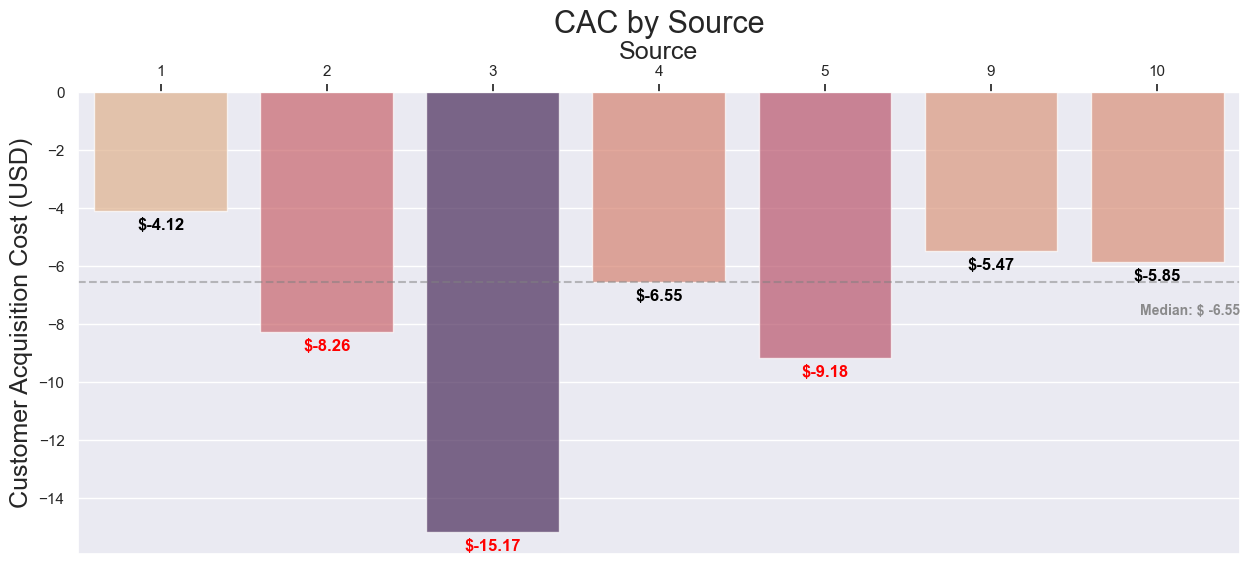

,source_id,cost_per_customer
2,3,-15.17
4,5,-9.18
1,2,-8.26
3,4,-6.55
6,10,-5.85
5,9,-5.47
0,1,-4.12


Median Customer Acquisition Cost: $ -6.55


In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

# Sort data by cost_per_customer in descending order
sorted_data = sb_data_cac_dep_final.sort_values(ascending=False, by="cost_per_customer")

# reverse values as we are interested in costs
sorted_data['cost_per_customer'] = -sorted_data['cost_per_customer']

# Create the bar plot
splot = sns.barplot(y="cost_per_customer", x="source_id", data=sorted_data, palette="flare_r", alpha=0.7, hue="cost_per_customer", legend=False)
ax.set_title("CAC by Source", fontdict={"size": 22})
plt.xlabel("Source", fontdict={"size": 18})
plt.ylabel("Customer Acquisition Cost (USD)", fontdict={"size": 18})

# Move the x-axis to the top
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

# Add a horizontal line for the mean
median_cac = sorted_data['cost_per_customer'].median()
plt.axhline(median_cac, color='grey', linestyle='--', alpha=0.5)
plt.text(len(sorted_data) - 0.5, median_cac - 1, f'Median: $ {median_cac:.2f}', 
         color='grey', alpha=0.9, fontsize=10, weight='bold', ha='right', va='center')

# Highlight top 3 negative values with red font color
top_3_negative_values = sorted_data['cost_per_customer'].nsmallest(3).values
for p in splot.patches:
    height = p.get_height()
    color = 'red' if height in top_3_negative_values else 'black'
    splot.annotate(f"${height:.2f}", 
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='top', 
                   xytext=(0, -5), 
                   textcoords='offset points', weight='bold', color=color)

plt.show()

# Display the data
display(sorted_data[['source_id', 'cost_per_customer']])
print(f'Median Customer Acquisition Cost: $ {median_cac:.2f}')

ID 1 has the lowest cost. Source ID 3 has the highest, nearly as 4 times higher as ID 1. Comparring this insights with the median purchase size of a customer, we can see that a customer has to buy on average 4 times in order to cover the marketing cost for source 3, whilst ID 1 is already covered with one order of an median purchase size of 6.55 USD.

Thus, Source ID 1 is four times more profitable than Source ID 3.

4.3.5 ROI by Source

In [47]:
import pandas as pd

# grouping by uid (users) with their first order
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

# renaming the columns
first_orders.columns = ['uid', 'first_order_ts']

# changing column datatype to datetime
first_orders['first_order_ts'] = pd.to_datetime(first_orders['first_order_ts'])
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date

# adding new column first_order_month as datetime MONTH to dataframe
first_orders['first_order_month'] = first_orders['first_order_ts'].dt.to_period('M').dt.to_timestamp()

# Ensure 'start_ts' is in datetime format
if 'start_ts' in visits.columns:
	visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# grouping uid (user) and get their first visits
first_source = visits.sort_values('start_ts').groupby('uid').first()

# targeting only source_id as column for first_source df
first_source = first_source[['source_id']]

# Merging first_orders and first_source
sources_orders = pd.merge(first_orders, first_source, left_on='uid', right_index=True)

# Grouping by source_id and first_order_dt
buyers_daily = sources_orders.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

# Ensure 'dt' in costs is in datetime format
costs['dt'] = pd.to_datetime(costs['dt'])

# Merging buyers_daily and costs
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'], how='inner')
costs_['costs_per_buyer'] = costs_['costs'] / costs_['n_buyers']

# Grouping by source_id to calculate total costs_per_buyer
sbx = costs_.groupby('source_id')['costs_per_buyer'].sum().reset_index()


get_source = visits[["uid", "source_id"]]

# dropping duplicates
get_source =get_source.drop_duplicates()
get_source= get_source.drop_duplicates(subset=["uid"], keep="first")

# merging orders_ and get_source to have souce id in one table

orders_ = orders_.merge(get_source, on= "uid")
orders_= orders_.drop_duplicates()

cohort_ltv_size = orders_.groupby(['source_id'], as_index=False).agg({'uid':'nunique'}).\
                 rename(columns={'uid':'n_buyers', 'source_id': 'source_id'})
source_revenue = orders_.groupby('source_id').agg({'revenue': 'sum'}).reset_index()
source_ltv_table = cohort_ltv_size.merge(source_revenue, on='source_id')
margin_rate = .5

source_ltv_table['gp'] = source_ltv_table['revenue'] * margin_rate

source_ltv_table['ltv'] = source_ltv_table['gp'] / source_ltv_table['n_buyers']

ltv_source_table = source_ltv_table.rename(columns={'ltv': 'LTV', 'source_id': 'Source ID'})


In [48]:
romi_df2 = sbx.merge(source_ltv_table, on= "source_id")
romi_df2 = romi_df2.rename(columns={'costs_per_buyer': 'costs_per_source'})
romi_df2['costs_per_buyer'] = romi_df2['costs_per_source']/romi_df2['n_buyers']
romi_df2["roi"] = romi_df2['ltv']/ romi_df2["costs_per_buyer"]

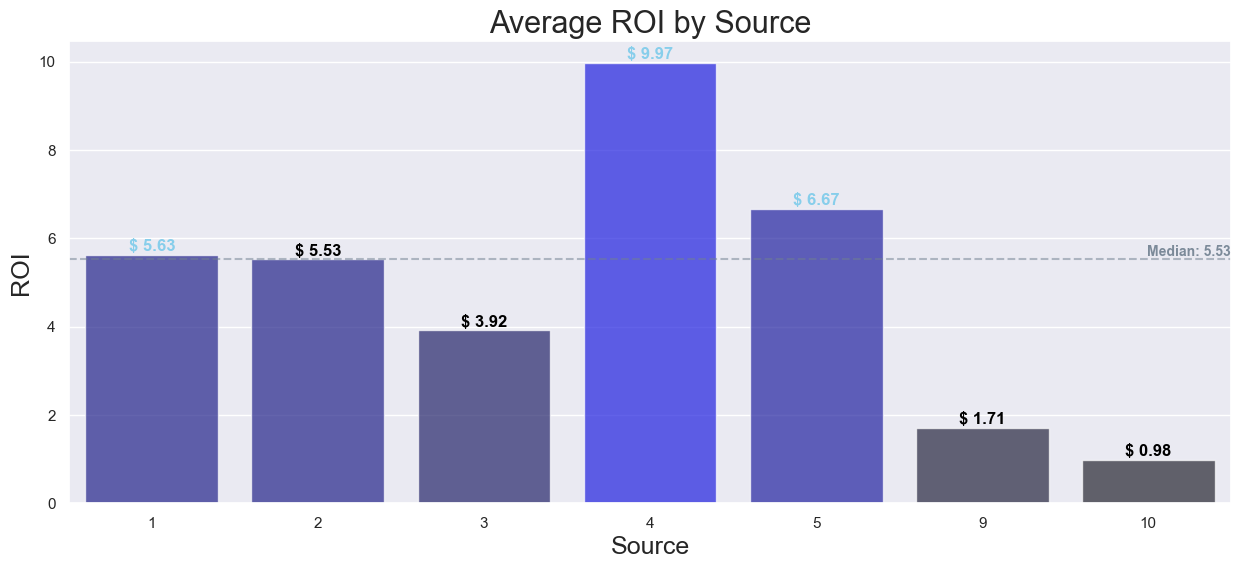

,source_id,roi
0,1,5.63
1,2,5.53
2,3,3.92
3,4,9.97
4,5,6.67
5,9,1.71
6,10,0.98


'Median ROI: 5.53'

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
splot=sns.barplot(y="roi", x= "source_id", data=romi_df2, color= "blue", alpha=0.7, hue="roi", legend=False)  
ax.set_title("Average ROI by Source", fontdict={"size":22})
plt.xlabel("Source", fontdict={"size":18})
plt.ylabel("ROI", fontdict={"size":18})

plt.axhline(romi_df2['roi'].median(), color= 'slategrey', label= 'Median ROI',
           ls= '--', alpha= .5)
plt.text(len(romi_df2) - 0.5, romi_df2['roi'].median(), 
         f'Median: {romi_df2["roi"].median():.2f}', 
         color='slategrey', alpha=0.9, fontsize=10, weight='bold', ha='right', va='bottom')


for p in splot.patches:
    # Highlight top 3 values with red font color
    color = 'skyblue' if p.get_height() in romi_df2['roi'].nlargest(3).values else 'black'
    splot.annotate(f'$ {p.get_height():.2f}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= (0, 6), 
                   textcoords = 'offset points', weight='bold', color=color)
plt.show()
display(romi_df2[['source_id','roi']])
display(f'Median ROI: {round(romi_df2.roi.median(), 2)}')

4.3.6 ROI by cohort

In [50]:
monthly_costs = costs.groupby('cost_month')["costs"].sum()

# change format to YYYY-MM for monthly_orders
monthly_orders['first_month'] = monthly_orders['first_month'].dt.strftime('%Y-%m')
report_ = pd.merge(monthly_orders, monthly_costs, left_on='first_month', right_on='cost_month')
report_['cac'] = report_['costs'] / report_['n_buyers']

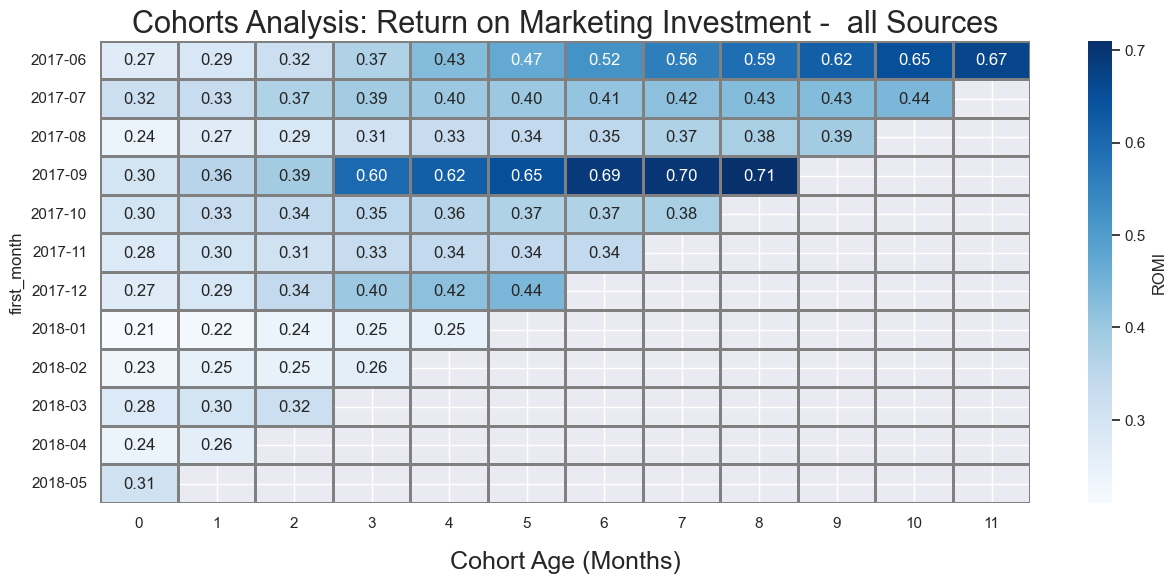

In [51]:
report_['roi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_month', 
    columns='age', 
    values='roi', 
    aggfunc='mean').cumsum(axis=1).round(2) 

plt.figure(figsize=(15, 6))
plt.title('Cohorts Analysis: Return on Marketing Investment -  all Sources', size= 22)
heatmap2 = sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap= 'Blues', cbar_kws={'label': 'ROMI'})
heatmap2.set_yticklabels(heatmap2.get_yticklabels(), rotation= 0)
plt.xlabel('Cohort Age (Months)', fontsize=18, labelpad=15)
plt.show()

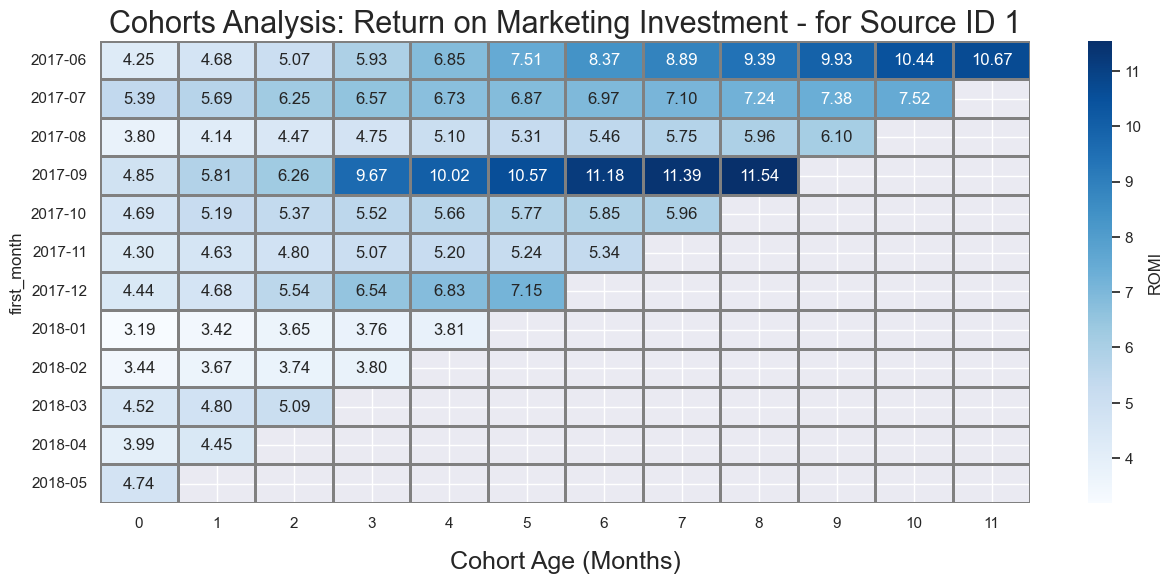

<Figure size 1500x600 with 0 Axes>

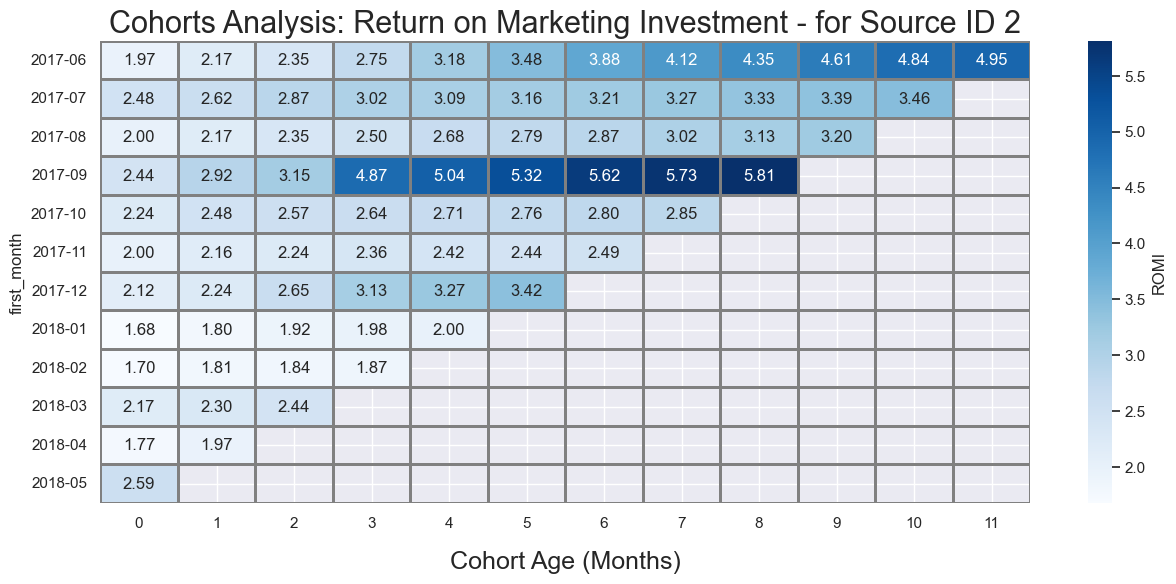

<Figure size 1500x600 with 0 Axes>

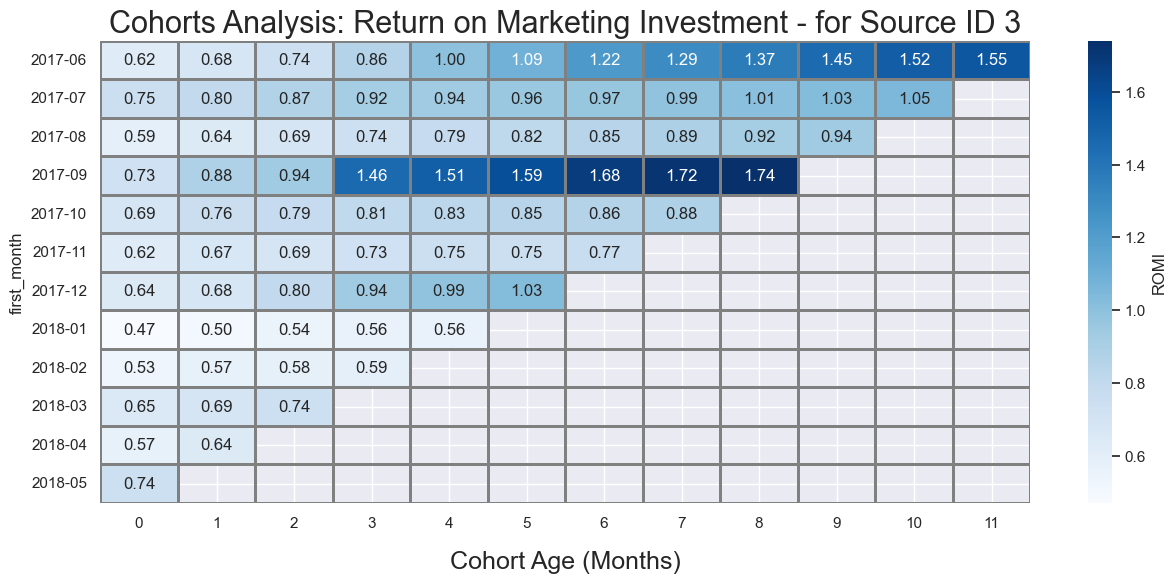

<Figure size 1500x600 with 0 Axes>

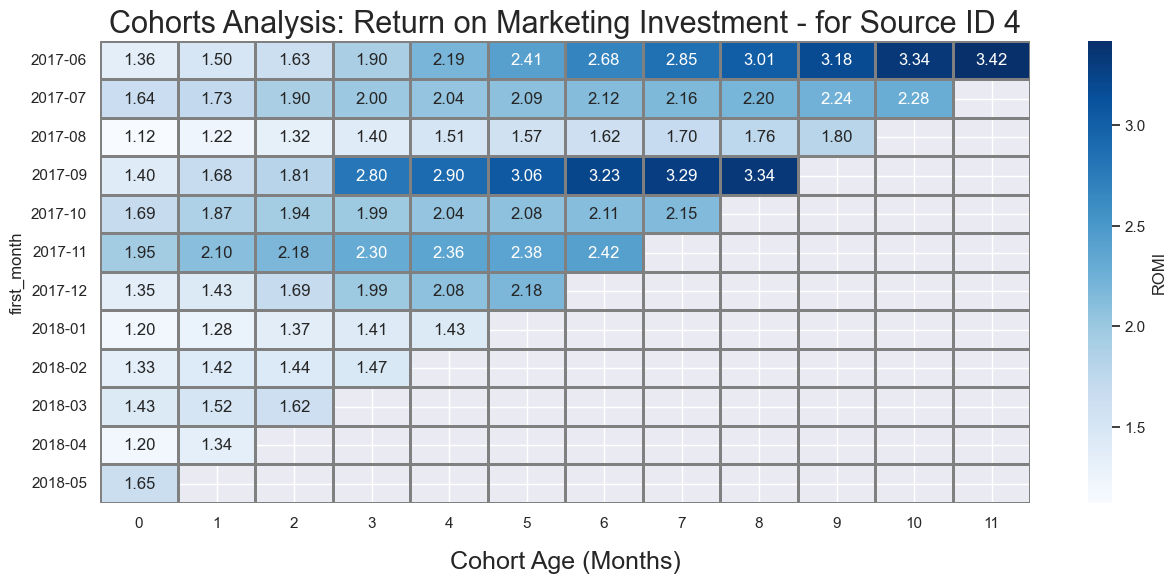

<Figure size 1500x600 with 0 Axes>

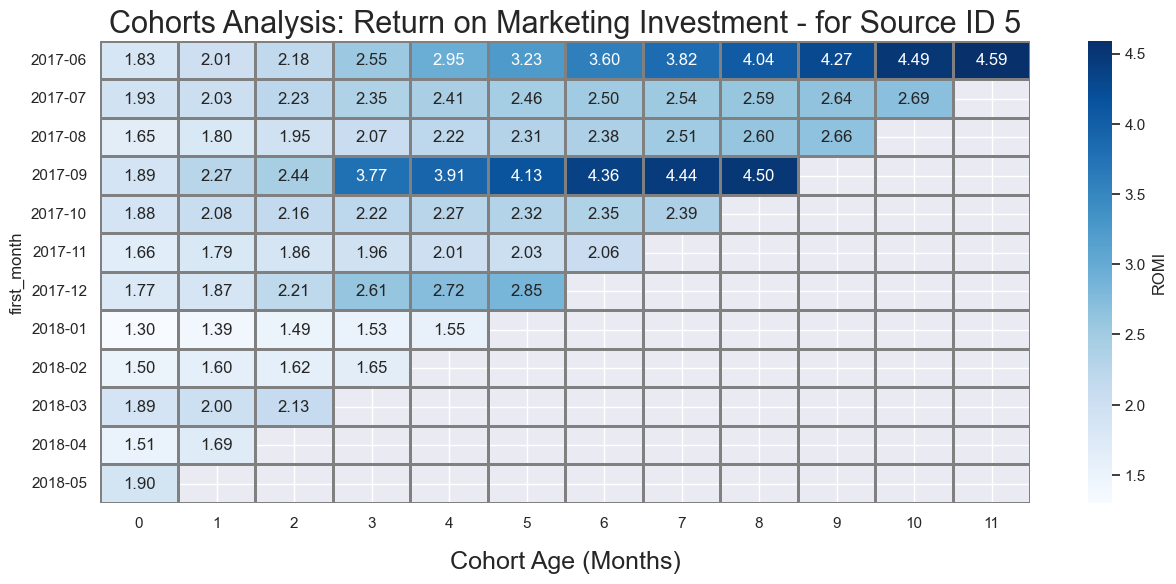

<Figure size 1500x600 with 0 Axes>

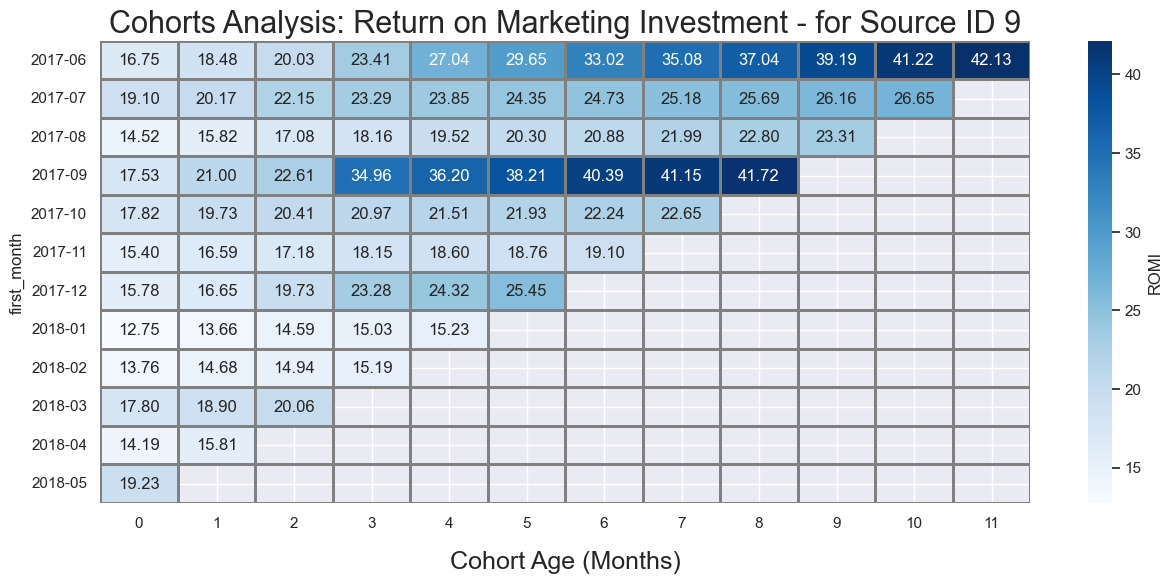

<Figure size 1500x600 with 0 Axes>

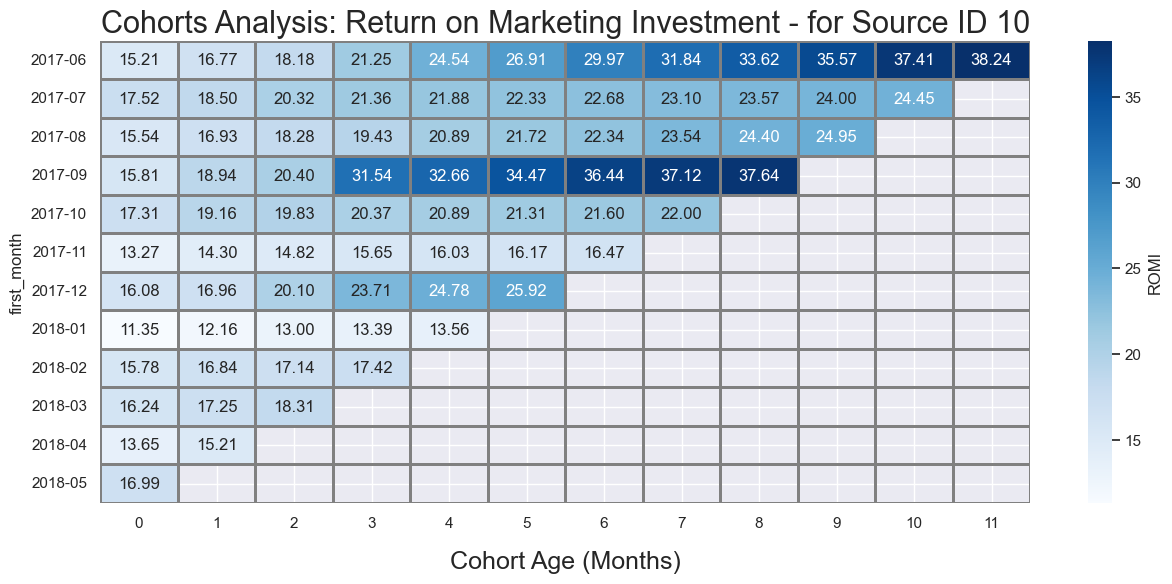

<Figure size 1500x600 with 0 Axes>

In [52]:
source_list_ = romi_df2['source_id'].tolist()
# display(source_list_)

for i in source_list_:
    
    single_source = costs.query('source_id == @i')
    
    ss_monthly_costs = single_source.groupby('cost_month')["costs"].sum()
    single_source_report = pd.merge(monthly_orders, 
                                    ss_monthly_costs, 
                                    left_on='first_month', 
                                    right_on='cost_month')
    
    single_source_report['cac'] = single_source_report['costs'] / single_source_report['n_buyers']
    single_source_report['roi'] = single_source_report['ltv'] / single_source_report['cac']
    
    single_source_output = single_source_report.pivot_table(
        index='first_month', 
        columns='age', 
        values='roi', 
        aggfunc='mean').cumsum(axis=1).round(2) 

    plt.figure(figsize=(15, 6))
    plt.title(f'Cohorts Analysis: Return on Marketing Investment - for Source ID {i}', size= 22)
    heatmap3 = sns.heatmap(single_source_output, 
                           annot=True, fmt='.2f',
                           linewidths=1,
                           linecolor='gray',
                           cmap='Blues',
                           cbar_kws={'label': 'ROMI'})
    heatmap3.set_yticklabels(heatmap3.get_yticklabels(), rotation= 0)
    plt.xlabel('Cohort Age (Months)', fontsize=18, labelpad=15)
    plt.show()

    plt.figure(figsize=(15, 6))


The September 2017 cohort had the highest return on investments, followed by the June 2017 cohort. May 2018 cohort had the lowest return on investments. No cohort has recouped 100% of invesments.

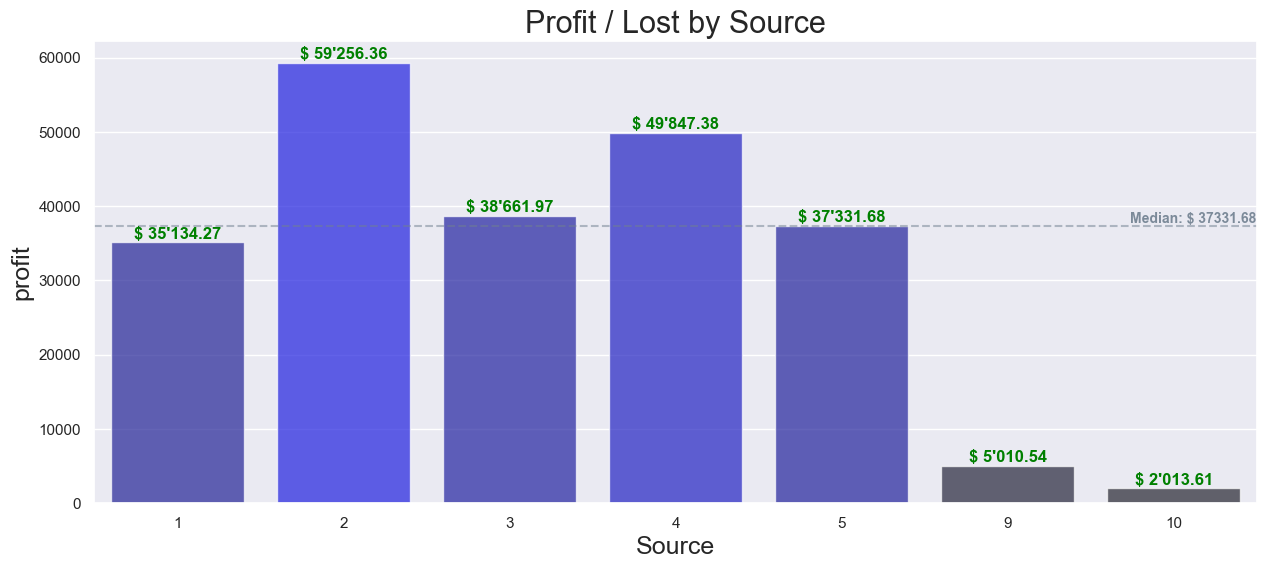

,source_id,revenue,costs_per_source,profit
0,1,38560.06,3425.79,35134.27
1,2,65152.26,5895.90,59256.36
2,3,44317.68,5655.71,38661.97
3,4,52479.75,2632.37,49847.38
4,5,40357.91,3026.23,37331.68
5,9,7076.98,2066.44,5010.54
6,10,4111.34,2097.73,2013.61


In [53]:
romi_df2["profit"] = romi_df2["revenue"]-romi_df2["costs_per_source"]

fig, ax = plt.subplots()
fig.set_size_inches(15,6)
splot=sns.barplot(y="profit", x= "source_id", data=romi_df2, color= "blue", alpha=0.7, hue="profit", legend=False)  
ax.set_title("Profit / Lost by Source", fontdict={"size":22})
plt.xlabel("Source", fontdict={"size":18})
plt.ylabel("profit", fontdict={"size":18})

#adding a horizontal line for the median
plt.axhline(romi_df2['profit'].median(), color= 'slategrey', label= 'Median profit',
           ls= '--', alpha= .5)
plt.text(len(romi_df2) - 0.5, romi_df2['profit'].median(),
         f'Median: $ {romi_df2["profit"].median():.2f}', 
         color='slategrey', alpha=0.9, fontsize=10, weight='bold', ha='right', va='bottom')

for p in splot.patches:
    
    # change color based on profit / lost:
    if int(p.get_height()) < 0:
        color_ = 'red'
        pos_txt = (0, -6)
        
    else:
        color_ = 'green'
        pos_txt = (0, 6)
    
    splot.annotate(f'$ {p.get_height():,.2f}'.replace(',', "'"),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext= pos_txt, 
                   textcoords = 'offset points', weight='bold',
                   color= color_
                  )
plt.show()

display(romi_df2[['source_id','revenue','costs_per_source','profit']])

---

# Conclusions and Recommendations
### Key Findings:
1. User engagement is strong but retention rates are low, indicating a need for improved user retention strategies.
2. Seasonal trends significantly impact sales, with December being the peak month.
3. Marketing investments are not fully optimized, with only a few sources generating positive ROI.

### Strategic Recommendations:
1. **Marketing Optimization**: Focus on high-performing sources (Source 1 and Source 2) and reduce spending on underperforming channels.
2. **Retention Strategies**: Implement loyalty programs and personalized marketing to enhance user retention.
3. **Infrastructure Improvements**: Address server vulnerabilities to prevent downtime during peak periods.